# Xarxa neuronal

In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import SGD
from sklearn.model_selection import StratifiedKFold
from scipy.stats import uniform as sp_rand
from scipy.stats import randint
from time import time
from sklearn import preprocessing

Using TensorFlow backend.


## Consum diari total multivariate multi-step

In [2]:
daily=pd.read_csv('C:/Users/Laura/Desktop/Smart meters London/workspace R/Dades netes/Final/daily_agr_mitjanaLlarPerDia_tot.csv')
daily.head(5)

,date,apparentTemperatureMax,apparentTemperatureMin,sunsetTimeHour,weekday,season,cloudCover,humidity,visibility,month,dewPoint,pressure,energy_sum
0,2014-02-08,5.67,2.19,17,6,winter,0.47,0.77,11.20,2,3.99,979.25,11.569300
1,2013-12-24,11.93,2.68,15,2,winter,0.40,0.81,10.86,12,5.42,979.52,11.981672
2,2012-11-01,11.46,0.85,16,4,autumn,0.44,0.85,12.54,11,5.06,979.63,10.781689
3,2014-02-05,5.86,1.03,16,3,winter,0.73,0.77,10.91,2,4.06,982.20,11.415105
4,2012-04-17,10.01,2.76,19,2,spring,0.60,0.87,11.86,4,5.74,982.22,10.617443


In [3]:
#Ens quedem amb date i energy_sum, ordenem valors per data i resetejem index
daily_dia=daily[['date','energy_sum','apparentTemperatureMax','apparentTemperatureMin','humidity' ]].sort_values(by=['date']).reset_index()
daily_dia.head(5)


,index,date,energy_sum,apparentTemperatureMax,apparentTemperatureMin,humidity
0,735,2011-11-23,6.952692,10.36,2.18,0.93
1,736,2011-11-24,8.536480,12.93,7.01,0.89
2,682,2011-11-25,9.499781,13.03,4.84,0.79
3,713,2011-11-26,10.267707,12.96,4.69,0.81
4,609,2011-11-27,10.850805,13.54,2.94,0.72


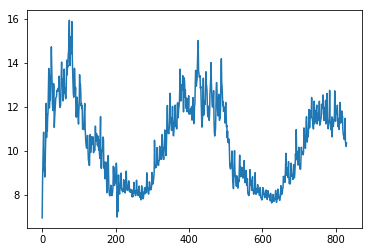

In [18]:
plt.plot(daily_dia.energy_sum )

In [4]:

daily_dia['y+1']=daily_dia['energy_sum'].shift(-1)
daily_dia['y+2']=daily_dia['energy_sum'].shift(-2)
daily_dia['y+3']=daily_dia['energy_sum'].shift(-3)
daily_dia['y+4']=daily_dia['energy_sum'].shift(-4)
daily_dia['y+5']=daily_dia['energy_sum'].shift(-5)
daily_dia['y+6']=daily_dia['energy_sum'].shift(-6)
daily_dia['y+7']=daily_dia['energy_sum'].shift(-7)
daily_dia['y+8']=daily_dia['energy_sum'].shift(-8)
daily_dia['y+9']=daily_dia['energy_sum'].shift(-9)
daily_dia['y+10']=daily_dia['energy_sum'].shift(-10)
daily_dia['y+11']=daily_dia['energy_sum'].shift(-11)
daily_dia['y+12']=daily_dia['energy_sum'].shift(-12)
daily_dia['y+13']=daily_dia['energy_sum'].shift(-13)
daily_dia['y+14']=daily_dia['energy_sum'].shift(-14)
daily_dia['y+15']=daily_dia['energy_sum'].shift(-15)
daily_dia['y+16']=daily_dia['energy_sum'].shift(-16)
daily_dia['y+17']=daily_dia['energy_sum'].shift(-17)
daily_dia['y+18']=daily_dia['energy_sum'].shift(-18)
daily_dia['y+19']=daily_dia['energy_sum'].shift(-19)
daily_dia['y+20']=daily_dia['energy_sum'].shift(-20)
daily_dia['y+21']=daily_dia['energy_sum'].shift(-21)
daily_dia['y+22']=daily_dia['energy_sum'].shift(-22)
daily_dia['y+23']=daily_dia['energy_sum'].shift(-23)
daily_dia['y+24']=daily_dia['energy_sum'].shift(-24)
daily_dia['y+25']=daily_dia['energy_sum'].shift(-25)
daily_dia['y+26']=daily_dia['energy_sum'].shift(-26)
daily_dia['y+27']=daily_dia['energy_sum'].shift(-27)
daily_dia['y+28']=daily_dia['energy_sum'].shift(-28)
daily_dia['y+29']=daily_dia['energy_sum'].shift(-29)
daily_dia['y+30']=daily_dia['energy_sum'].shift(-30)
daily_dia['y+31']=daily_dia['energy_sum'].shift(-31)
daily_dia['y+32']=daily_dia['energy_sum'].shift(-32)
daily_dia['y+33']=daily_dia['energy_sum'].shift(-33)
daily_dia['y+34']=daily_dia['energy_sum'].shift(-34)
daily_dia['y+35']=daily_dia['energy_sum'].shift(-35)
daily_dia['y+36']=daily_dia['energy_sum'].shift(-36)
daily_dia['y+37']=daily_dia['energy_sum'].shift(-37)
daily_dia['y+38']=daily_dia['energy_sum'].shift(-38)
daily_dia['y+39']=daily_dia['energy_sum'].shift(-39)
daily_dia['y+40']=daily_dia['energy_sum'].shift(-40)
daily_dia['y+41']=daily_dia['energy_sum'].shift(-41)
daily_dia['y+42']=daily_dia['energy_sum'].shift(-42)
daily_dia['y+43']=daily_dia['energy_sum'].shift(-43)
daily_dia['y+44']=daily_dia['energy_sum'].shift(-44)
daily_dia['y+45']=daily_dia['energy_sum'].shift(-45)
daily_dia['y+46']=daily_dia['energy_sum'].shift(-46)
daily_dia['y+47']=daily_dia['energy_sum'].shift(-47)
daily_dia['y+48']=daily_dia['energy_sum'].shift(-48)
daily_dia['y+49']=daily_dia['energy_sum'].shift(-49)
daily_dia['y+50']=daily_dia['energy_sum'].shift(-50)
daily_dia['y+51']=daily_dia['energy_sum'].shift(-51)
daily_dia['y+52']=daily_dia['energy_sum'].shift(-52)
daily_dia['y+53']=daily_dia['energy_sum'].shift(-53)
daily_dia['y+54']=daily_dia['energy_sum'].shift(-54)
daily_dia['y+55']=daily_dia['energy_sum'].shift(-55)
daily_dia['y+56']=daily_dia['energy_sum'].shift(-56)
daily_dia['y+57']=daily_dia['energy_sum'].shift(-57)
daily_dia['y+58']=daily_dia['energy_sum'].shift(-58)
daily_dia['y+59']=daily_dia['energy_sum'].shift(-59)
daily_dia['y+60']=daily_dia['energy_sum'].shift(-60)


daily_dia['t-1']=daily_dia['energy_sum'].shift(1)
daily_dia['t-2']=daily_dia['energy_sum'].shift(2)
daily_dia['t-3']=daily_dia['energy_sum'].shift(3)
daily_dia['t-4']=daily_dia['energy_sum'].shift(4)
daily_dia['t-5']=daily_dia['energy_sum'].shift(5)
daily_dia['t-6']=daily_dia['energy_sum'].shift(6)
daily_dia['t-7']=daily_dia['energy_sum'].shift(7)
daily_dia['t-8']=daily_dia['energy_sum'].shift(8)
daily_dia['t-9']=daily_dia['energy_sum'].shift(9)
daily_dia['t-10']=daily_dia['energy_sum'].shift(10)
daily_dia['t-11']=daily_dia['energy_sum'].shift(11)
daily_dia['t-12']=daily_dia['energy_sum'].shift(12)
daily_dia['t-13']=daily_dia['energy_sum'].shift(13)
daily_dia['t-14']=daily_dia['energy_sum'].shift(14)

daily_dia['temp(t-1)']=daily_dia['apparentTemperatureMax'].shift(1)
daily_dia['temp(t-2)']=daily_dia['apparentTemperatureMax'].shift(2)
daily_dia['temp(t-3)']=daily_dia['apparentTemperatureMax'].shift(3)
daily_dia['temp(t-4)']=daily_dia['apparentTemperatureMax'].shift(4)
daily_dia['temp(t-5)']=daily_dia['apparentTemperatureMax'].shift(5)
daily_dia['temp(t-6)']=daily_dia['apparentTemperatureMax'].shift(6)
daily_dia['temp(t-7)']=daily_dia['apparentTemperatureMax'].shift(7)
daily_dia['temp(t-8)']=daily_dia['apparentTemperatureMax'].shift(8)
daily_dia['temp(t-9)']=daily_dia['apparentTemperatureMax'].shift(9)
daily_dia['temp(t-10)']=daily_dia['apparentTemperatureMax'].shift(10)
daily_dia['temp(t-11)']=daily_dia['apparentTemperatureMax'].shift(11)
daily_dia['temp(t-12)']=daily_dia['apparentTemperatureMax'].shift(12)
daily_dia['temp(t-13)']=daily_dia['apparentTemperatureMax'].shift(13)
daily_dia['temp(t-14)']=daily_dia['apparentTemperatureMax'].shift(14)

daily_dia['tempmin(t-1)']=daily_dia['apparentTemperatureMin'].shift(1)
daily_dia['tempmin(t-2)']=daily_dia['apparentTemperatureMin'].shift(2)
daily_dia['tempmin(t-3)']=daily_dia['apparentTemperatureMin'].shift(3)
daily_dia['tempmin(t-4)']=daily_dia['apparentTemperatureMin'].shift(4)
daily_dia['tempmin(t-5)']=daily_dia['apparentTemperatureMin'].shift(5)
daily_dia['tempmin(t-6)']=daily_dia['apparentTemperatureMin'].shift(6)
daily_dia['tempmin(t-7)']=daily_dia['apparentTemperatureMin'].shift(7)
daily_dia['tempmin(t-8)']=daily_dia['apparentTemperatureMin'].shift(8)
daily_dia['tempmin(t-9)']=daily_dia['apparentTemperatureMin'].shift(9)
daily_dia['tempmin(t-10)']=daily_dia['apparentTemperatureMin'].shift(10)
daily_dia['tempmin(t-11)']=daily_dia['apparentTemperatureMin'].shift(11)
daily_dia['tempmin(t-12)']=daily_dia['apparentTemperatureMin'].shift(12)
daily_dia['tempmin(t-13)']=daily_dia['apparentTemperatureMin'].shift(13)
daily_dia['tempmin(t-14)']=daily_dia['apparentTemperatureMin'].shift(14)

daily_dia['humidity(t-1)']=daily_dia['humidity'].shift(1)
daily_dia['humidity(t-2)']=daily_dia['humidity'].shift(2)
daily_dia['humidity(t-3)']=daily_dia['humidity'].shift(3)
daily_dia['humidity(t-4)']=daily_dia['humidity'].shift(4)
daily_dia['humidity(t-5)']=daily_dia['humidity'].shift(5)
daily_dia['humidity(t-6)']=daily_dia['humidity'].shift(6)
daily_dia['humidity(t-7)']=daily_dia['humidity'].shift(7)
daily_dia['humidity(t-8)']=daily_dia['humidity'].shift(8)
daily_dia['humidity(t-9)']=daily_dia['humidity'].shift(9)
daily_dia['humidity(t-10)']=daily_dia['humidity'].shift(10)
daily_dia['humidity(t-11)']=daily_dia['humidity'].shift(11)
daily_dia['humidity(t-12)']=daily_dia['humidity'].shift(12)
daily_dia['humidity(t-13)']=daily_dia['humidity'].shift(13)
daily_dia['humidity(t-14)']=daily_dia['humidity'].shift(14)


daily_dia

,index,date,energy_sum,apparentTemperatureMax,apparentTemperatureMin,humidity,y+1,y+2,y+3,y+4,...,humidity(t-5),humidity(t-6),humidity(t-7),humidity(t-8),humidity(t-9),humidity(t-10),humidity(t-11),humidity(t-12),humidity(t-13),humidity(t-14)
0,735,2011-11-23,6.952692,10.36,2.18,0.93,8.536480,9.499781,10.267707,10.850805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,736,2011-11-24,8.536480,12.93,7.01,0.89,9.499781,10.267707,10.850805,9.103382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,682,2011-11-25,9.499781,13.03,4.84,0.79,10.267707,10.850805,9.103382,9.274873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,713,2011-11-26,10.267707,12.96,4.69,0.81,10.850805,9.103382,9.274873,8.813513,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,609,2011-11-27,10.850805,13.54,2.94,0.72,9.103382,9.274873,8.813513,9.227707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,641,2011-11-28,9.103382,12.58,1.31,0.86,9.274873,8.813513,9.227707,10.145910,...,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,265,2011-11-29,9.274873,13.47,3.39,0.82,8.813513,9.227707,10.145910,10.780273,...,0.89,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,571,2011-11-30,8.813513,11.87,3.34,0.78,9.227707,10.145910,10.780273,12.163127,...,0.79,0.89,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,199,2011-12-01,9.227707,12.15,5.29,0.82,10.145910,10.780273,12.163127,10.609714,...,0.81,0.79,0.89,0.93,NaN,NaN,NaN,NaN,NaN,NaN
9,338,2011-12-02,10.145910,5.33,0.46,0.87,10.780273,12.163127,10.609714,11.673417,...,0.72,0.81,0.79,0.89,0.93,NaN,NaN,NaN,NaN,NaN


In [5]:
#Ens quedem amb energies i temperatures 
#No agafem apparent temperature max ja que quan fem la predicció representa que no ho sabem
daily_dia=daily_dia.drop(['index','date','apparentTemperatureMax','apparentTemperatureMin', 'humidity'], axis=1)
daily_dia.head(5)


,energy_sum,y+1,y+2,y+3,y+4,y+5,y+6,y+7,y+8,y+9,...,humidity(t-5),humidity(t-6),humidity(t-7),humidity(t-8),humidity(t-9),humidity(t-10),humidity(t-11),humidity(t-12),humidity(t-13),humidity(t-14)
0,6.952692,8.536480,9.499781,10.267707,10.850805,9.103382,9.274873,8.813513,9.227707,10.145910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.536480,9.499781,10.267707,10.850805,9.103382,9.274873,8.813513,9.227707,10.145910,10.780273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.499781,10.267707,10.850805,9.103382,9.274873,8.813513,9.227707,10.145910,10.780273,12.163127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.267707,10.850805,9.103382,9.274873,8.813513,9.227707,10.145910,10.780273,12.163127,10.609714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.850805,9.103382,9.274873,8.813513,9.227707,10.145910,10.780273,12.163127,10.609714,11.673417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Eliminem les 14 primeres files ja que contenen NaN (valors buits)

daily_dia=daily_dia.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
daily_dia.head(5)

,energy_sum,y+1,y+2,y+3,y+4,y+5,y+6,y+7,y+8,y+9,...,humidity(t-5),humidity(t-6),humidity(t-7),humidity(t-8),humidity(t-9),humidity(t-10),humidity(t-11),humidity(t-12),humidity(t-13),humidity(t-14)
14,10.889362,11.525150,11.759837,12.633801,13.749174,11.951958,11.957446,12.392776,12.307079,13.376080,...,0.87,0.82,0.78,0.82,0.86,0.72,0.81,0.79,0.89,0.93
15,11.525150,11.759837,12.633801,13.749174,11.951958,11.957446,12.392776,12.307079,13.376080,13.511968,...,0.79,0.87,0.82,0.78,0.82,0.86,0.72,0.81,0.79,0.89
16,11.759837,12.633801,13.749174,11.951958,11.957446,12.392776,12.307079,13.376080,13.511968,14.732271,...,0.82,0.79,0.87,0.82,0.78,0.82,0.86,0.72,0.81,0.79
17,12.633801,13.749174,11.951958,11.957446,12.392776,12.307079,13.376080,13.511968,14.732271,13.774471,...,0.77,0.82,0.79,0.87,0.82,0.78,0.82,0.86,0.72,0.81
18,13.749174,11.951958,11.957446,12.392776,12.307079,13.376080,13.511968,14.732271,13.774471,12.709106,...,0.83,0.77,0.82,0.79,0.87,0.82,0.78,0.82,0.86,0.72


In [7]:
daily_dia=daily_dia.drop([829,828,827,826,825,824,823, 822,821,820,819,818,817,816,815,814,813,812,811,810,809,808,807,806,805,804,803,802,801,800,799,798,797,796,795,794,793,792,791,790,789,788,787,786,785,784,783,782,781,780,779,778,777,776,775,774,773,772,771,770])
daily_dia.tail(5)

,energy_sum,y+1,y+2,y+3,y+4,y+5,y+6,y+7,y+8,y+9,...,humidity(t-5),humidity(t-6),humidity(t-7),humidity(t-8),humidity(t-9),humidity(t-10),humidity(t-11),humidity(t-12),humidity(t-13),humidity(t-14)
765,12.542847,11.655859,11.661978,11.379026,11.973593,11.813610,11.913917,12.302586,11.223347,11.489046,...,0.79,0.78,0.88,0.90,0.89,0.91,0.81,0.85,0.94,0.93
766,11.655859,11.661978,11.379026,11.973593,11.813610,11.913917,12.302586,11.223347,11.489046,11.995096,...,0.86,0.79,0.78,0.88,0.90,0.89,0.91,0.81,0.85,0.94
767,11.661978,11.379026,11.973593,11.813610,11.913917,12.302586,11.223347,11.489046,11.995096,12.611274,...,0.73,0.86,0.79,0.78,0.88,0.90,0.89,0.91,0.81,0.85
768,11.379026,11.973593,11.813610,11.913917,12.302586,11.223347,11.489046,11.995096,12.611274,11.408516,...,0.84,0.73,0.86,0.79,0.78,0.88,0.90,0.89,0.91,0.81
769,11.973593,11.813610,11.913917,12.302586,11.223347,11.489046,11.995096,12.611274,11.408516,11.268234,...,0.81,0.84,0.73,0.86,0.79,0.78,0.88,0.90,0.89,0.91


In [8]:
len(daily_dia)


756

In [9]:

#normalitzem
scaler=preprocessing.MinMaxScaler(feature_range=(0, 1))
daily_dia_norm=scaler.fit_transform(daily_dia)



In [12]:


#Seleccionem dades per test i train
y_daily=daily_dia_norm[:,0:60]
X_daily=daily_dia_norm[:,61:118]

#y_daily=daily_dia['energy_sum']
#X_daily=daily_dia.drop(['energy_sum'], axis='columns')



#Reshape de [samples,timesteps] a [samples,timesteps,features]

#Enlloc de 14 features en son 7 de una feature i 7 duna altre
X_daily=np.reshape(X_daily, (X_daily.shape[0], 14,4))



In [13]:

# definim model
import tensorflow as tf
model =Sequential()
model.add(LSTM(50, activation='relu', input_shape=(14, 4)))
model.add(Dense(60))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [14]:

import math
from sklearn.metrics import mean_squared_error

#Walk forward per test i train
minim=100
n_train=465
lenght=len(daily_dia)

llista_evaluate=list()
llista_prediccions=list()
llista_preditrain=list()
llista_scores=list()
llista_scoretrain=list()
sumScores=0

for i in range(n_train,lenght):
    #minim=minim+1
    X_train,X_test= X_daily[minim:i],X_daily[i:i+1]
    y_train,y_test= y_daily[minim:i],y_daily[i:i+1]

    #fem fit al model
    model.fit(X_train, y_train, epochs=50, verbose=0)
    
    #mostrem score per cada model
    score=model.evaluate(X_test,y_test,verbose=0)
    llista_evaluate.append(score)
    
    #Predim per cadascun
    preditest=model.predict(X_test)
    llista_prediccions.append(preditest)
    
    preditrain=model.predict(X_train)
    llista_preditrain.append(preditrain)
    
    trainScore = math.sqrt(mean_squared_error(y_train, preditrain))
    llista_scoretrain.append(trainScore )
    

    testScore = math.sqrt(mean_squared_error(y_test, preditest))
    llista_scores.append(testScore)
   
    sumScores=sumScores+testScore

Instructions for updating:
Use tf.cast instead.


In [15]:
#Dividim la suma de scores de test entre el nombre de prediccions per obtenir la mitjana
sumScores/(lenght-n_train)

0.07616206263029822

In [16]:
#Fem llista amb les prediccions
llista_p=list()
for i in range(len(llista_prediccions)):
    llista_p.append(llista_prediccions[i].tolist())
    
llista_p

[[[0.5449538826942444,
   0.5526272654533386,
   0.5182319283485413,
   0.5281034708023071,
   0.5503360033035278,
   0.5329936146736145,
   0.5358158349990845,
   0.5253902673721313,
   0.5439688563346863,
   0.5455491542816162,
   0.5391705632209778,
   0.5343717336654663,
   0.5291777849197388,
   0.5193900465965271,
   0.5436458587646484,
   0.5553724765777588,
   0.524225652217865,
   0.5348421335220337,
   0.5070203542709351,
   0.5150138139724731,
   0.5252707600593567,
   0.5103194117546082,
   0.5492348074913025,
   0.5224864482879639,
   0.5289140939712524,
   0.499335914850235,
   0.5154221057891846,
   0.5440959930419922,
   0.5268644690513611,
   0.5369056463241577,
   0.5231122374534607,
   0.5232843160629272,
   0.51434326171875,
   0.4970332682132721,
   0.4953985810279846,
   0.49861428141593933,
   0.49955829977989197,
   0.4756455719470978,
   0.4704572260379791,
   0.47274771332740784,
   0.45138484239578247,
   0.4772431254386902,
   0.47550004720687866,
   0.46956

In [17]:
#Fem llista amb la predicció de només el dia següent
llista_p0=list()
for i in range(len(llista_p)):
    llista_p0.append(llista_p[i][0][0])

#Fem llista amb la predicció de 2 dies
llista_p1=list()
for i in range(len(llista_p)):
    llista_p1.append(llista_p[i][0][1])

#Altres dies

llista_p2=list()
for i in range(len(llista_p)):
    llista_p2.append(llista_p[i][0][2])
    
llista_p3=list()
for i in range(len(llista_p)):
    llista_p3.append(llista_p[i][0][3])
    
llista_p4=list()
for i in range(len(llista_p)):
    llista_p4.append(llista_p[i][0][4])
    
llista_p5=list()
for i in range(len(llista_p)):
    llista_p5.append(llista_p[i][0][5])
    
llista_p6=list()
for i in range(len(llista_p)):
    llista_p6.append(llista_p[i][0][6])

llista_p7=list()
for i in range(len(llista_p)):
    llista_p7.append(llista_p[i][0][7])

llista_p8=list()
for i in range(len(llista_p)):
    llista_p8.append(llista_p[i][0][8])
    
llista_p9=list()
for i in range(len(llista_p)):
    llista_p9.append(llista_p[i][0][9])
    
llista_p10=list()
for i in range(len(llista_p)):
    llista_p10.append(llista_p[i][0][10])
    
llista_p11=list()
for i in range(len(llista_p)):
    llista_p11.append(llista_p[i][0][11])
    
llista_p12=list()
for i in range(len(llista_p)):
    llista_p12.append(llista_p[i][0][12])
    
llista_p13=list()
for i in range(len(llista_p)):
    llista_p13.append(llista_p[i][0][13])
    
llista_p14=list()
for i in range(len(llista_p)):
    llista_p14.append(llista_p[i][0][14])
    
llista_p15=list()
for i in range(len(llista_p)):
    llista_p15.append(llista_p[i][0][15])
    
llista_p16=list()
for i in range(len(llista_p)):
    llista_p16.append(llista_p[i][0][16])
    
llista_p17=list()
for i in range(len(llista_p)):
    llista_p17.append(llista_p[i][0][17])
    
llista_p18=list()
for i in range(len(llista_p)):
    llista_p18.append(llista_p[i][0][18])
    
llista_p19=list()
for i in range(len(llista_p)):
    llista_p19.append(llista_p[i][0][19])
    
llista_p20=list()
for i in range(len(llista_p)):
    llista_p20.append(llista_p[i][0][20])
    
llista_p21=list()
for i in range(len(llista_p)):
    llista_p21.append(llista_p[i][0][21])
    
llista_p22=list()
for i in range(len(llista_p)):
    llista_p22.append(llista_p[i][0][22])
    
llista_p23=list()
for i in range(len(llista_p)):
    llista_p23.append(llista_p[i][0][23])
    
    llista_p24=list()
for i in range(len(llista_p)):
    llista_p24.append(llista_p[i][0][24])
    
llista_p25=list()
for i in range(len(llista_p)):
    llista_p25.append(llista_p[i][0][25])
    
llista_p26=list()
for i in range(len(llista_p)):
    llista_p26.append(llista_p[i][0][26])
    
llista_p27=list()
for i in range(len(llista_p)):
    llista_p27.append(llista_p[i][0][27])
    
llista_p28=list()
for i in range(len(llista_p)):
    llista_p28.append(llista_p[i][0][28])
    
llista_p29=list()
for i in range(len(llista_p)):
    llista_p29.append(llista_p[i][0][29])
    
    
    
#Fem llista amb la predicció de només el dia següent
llista_p30=list()
for i in range(len(llista_p)):
    llista_p30.append(llista_p[i][0][30])

#Fem llista amb la predicció de 2 dies
llista_p31=list()
for i in range(len(llista_p)):
    llista_p31.append(llista_p[i][0][31])

#Altres dies

llista_p32=list()
for i in range(len(llista_p)):
    llista_p32.append(llista_p[i][0][32])
    
llista_p33=list()
for i in range(len(llista_p)):
    llista_p33.append(llista_p[i][0][33])
    
llista_p34=list()
for i in range(len(llista_p)):
    llista_p34.append(llista_p[i][0][34])
    
llista_p35=list()
for i in range(len(llista_p)):
    llista_p35.append(llista_p[i][0][35])
    
llista_p36=list()
for i in range(len(llista_p)):
    llista_p36.append(llista_p[i][0][36])

llista_p37=list()
for i in range(len(llista_p)):
    llista_p37.append(llista_p[i][0][37])

llista_p38=list()
for i in range(len(llista_p)):
    llista_p38.append(llista_p[i][0][38])
    
llista_p39=list()
for i in range(len(llista_p)):
    llista_p39.append(llista_p[i][0][39])
    
llista_p40=list()
for i in range(len(llista_p)):
    llista_p40.append(llista_p[i][0][40])
    
llista_p41=list()
for i in range(len(llista_p)):
    llista_p41.append(llista_p[i][0][41])
    
llista_p42=list()
for i in range(len(llista_p)):
    llista_p42.append(llista_p[i][0][42])
    
llista_p43=list()
for i in range(len(llista_p)):
    llista_p43.append(llista_p[i][0][43])
    
llista_p44=list()
for i in range(len(llista_p)):
    llista_p44.append(llista_p[i][0][44])
    
llista_p45=list()
for i in range(len(llista_p)):
    llista_p45.append(llista_p[i][0][45])
    
llista_p46=list()
for i in range(len(llista_p)):
    llista_p46.append(llista_p[i][0][46])
    
llista_p47=list()
for i in range(len(llista_p)):
    llista_p47.append(llista_p[i][0][47])
    
llista_p48=list()
for i in range(len(llista_p)):
    llista_p48.append(llista_p[i][0][48])
    
llista_p49=list()
for i in range(len(llista_p)):
    llista_p49.append(llista_p[i][0][49])
    
llista_p50=list()
for i in range(len(llista_p)):
    llista_p50.append(llista_p[i][0][50])
    
llista_p51=list()
for i in range(len(llista_p)):
    llista_p51.append(llista_p[i][0][51])
    
llista_p52=list()
for i in range(len(llista_p)):
    llista_p52.append(llista_p[i][0][52])
    
llista_p53=list()
for i in range(len(llista_p)):
    llista_p53.append(llista_p[i][0][53])
    
    llista_p54=list()
for i in range(len(llista_p)):
    llista_p54.append(llista_p[i][0][54])
    
llista_p55=list()
for i in range(len(llista_p)):
    llista_p55.append(llista_p[i][0][55])
    
llista_p56=list()
for i in range(len(llista_p)):
    llista_p56.append(llista_p[i][0][56])
    
llista_p57=list()
for i in range(len(llista_p)):
    llista_p57.append(llista_p[i][0][57])
    
llista_p58=list()
for i in range(len(llista_p)):
    llista_p58.append(llista_p[i][0][58])
    
llista_p59=list()
for i in range(len(llista_p)):
    llista_p59.append(llista_p[i][0][59])


In [18]:
score0=math.sqrt(mean_squared_error(y_daily[n_train:lenght,0], llista_p0))
print("Error predicció 1 dia següent: {}".format(score0))
score1=math.sqrt(mean_squared_error(y_daily[n_train:lenght,1], llista_p1))
print("Error predicció 2 dia següent: {}".format(score1))
score2=math.sqrt(mean_squared_error(y_daily[n_train:lenght,2], llista_p2))
print("Error predicció 3 dia següent: {}".format(score2))
score3=math.sqrt(mean_squared_error(y_daily[n_train:lenght,3], llista_p3))
print("Error predicció 4 dia següent: {}".format(score3))
score4=math.sqrt(mean_squared_error(y_daily[n_train:lenght,4], llista_p4))
print("Error predicció 5 dia següent: {}".format(score4))
score5=math.sqrt(mean_squared_error(y_daily[n_train:lenght,5], llista_p5))
print("Error predicció 6 dia següent: {}".format(score5))
score6=math.sqrt(mean_squared_error(y_daily[n_train:lenght,6], llista_p6))
print("Error predicció 7 dia següent: {}".format(score6))
score7=math.sqrt(mean_squared_error(y_daily[n_train:lenght,7], llista_p7))
print("Error predicció 8 dia següent: {}".format(score7))
score8=math.sqrt(mean_squared_error(y_daily[n_train:lenght,8], llista_p8))
print("Error predicció 9 dia següent: {}".format(score8))
score9=math.sqrt(mean_squared_error(y_daily[n_train:lenght,9], llista_p9))
print("Error predicció 10 dia següent: {}".format(score9))
score10=math.sqrt(mean_squared_error(y_daily[n_train:lenght,10], llista_p10))
print("Error predicció 11 dia següent: {}".format(score10))
score11=math.sqrt(mean_squared_error(y_daily[n_train:lenght,11], llista_p11))
print("Error predicció 12 dia següent: {}".format(score11))
score12=math.sqrt(mean_squared_error(y_daily[n_train:lenght,12], llista_p12))
print("Error predicció 13 dia següent: {}".format(score12))
score13=math.sqrt(mean_squared_error(y_daily[n_train:lenght,13], llista_p13))
print("Error predicció 14 dia següent: {}".format(score13))
score14=math.sqrt(mean_squared_error(y_daily[n_train:lenght,14], llista_p14))
print("Error predicció 15 dia següent: {}".format(score14))
score15=math.sqrt(mean_squared_error(y_daily[n_train:lenght,15], llista_p15))
print("Error predicció 16 dia següent: {}".format(score15))
score16=math.sqrt(mean_squared_error(y_daily[n_train:lenght,16], llista_p16))
print("Error predicció 17 dia següent: {}".format(score16))
score17=math.sqrt(mean_squared_error(y_daily[n_train:lenght,17], llista_p17))
print("Error predicció 18 dia següent: {}".format(score17))
score18=math.sqrt(mean_squared_error(y_daily[n_train:lenght,18], llista_p18))
print("Error predicció 19 dia següent: {}".format(score18))
score19=math.sqrt(mean_squared_error(y_daily[n_train:lenght,19], llista_p19))
print("Error predicció 20 dia següent: {}".format(score19))
score20=math.sqrt(mean_squared_error(y_daily[n_train:lenght,20], llista_p20))
print("Error predicció 21 dia següent: {}".format(score20))
score21=math.sqrt(mean_squared_error(y_daily[n_train:lenght,21], llista_p21))
print("Error predicció 22 dia següent: {}".format(score21))
score22=math.sqrt(mean_squared_error(y_daily[n_train:lenght,22], llista_p22))
print("Error predicció 23 dia següent: {}".format(score22))
score23=math.sqrt(mean_squared_error(y_daily[n_train:lenght,23], llista_p23))
print("Error predicció 24 dia següent: {}".format(score23))
score24=math.sqrt(mean_squared_error(y_daily[n_train:lenght,24], llista_p24))
print("Error predicció 25 dia següent: {}".format(score24))
score25=math.sqrt(mean_squared_error(y_daily[n_train:lenght,25], llista_p25))
print("Error predicció 26 dia següent: {}".format(score25))
score26=math.sqrt(mean_squared_error(y_daily[n_train:lenght,26], llista_p26))
print("Error predicció 27 dia següent: {}".format(score26))
score27=math.sqrt(mean_squared_error(y_daily[n_train:lenght,27], llista_p27))
print("Error predicció 28 dia següent: {}".format(score27))
score28=math.sqrt(mean_squared_error(y_daily[n_train:lenght,28], llista_p28))
print("Error predicció 29 dia següent: {}".format(score28))
score29=math.sqrt(mean_squared_error(y_daily[n_train:lenght,29], llista_p29))
print("Error predicció 30 dia següent: {}".format(score29))

score30=math.sqrt(mean_squared_error(y_daily[n_train:lenght,30], llista_p30))
print("Error predicció 31 dia següent: {}".format(score30))
score31=math.sqrt(mean_squared_error(y_daily[n_train:lenght,31], llista_p31))
print("Error predicció 32 dia següent: {}".format(score31))
score32=math.sqrt(mean_squared_error(y_daily[n_train:lenght,32], llista_p32))
print("Error predicció 33 dia següent: {}".format(score32))
score33=math.sqrt(mean_squared_error(y_daily[n_train:lenght,33], llista_p33))
print("Error predicció 34 dia següent: {}".format(score33))
score34=math.sqrt(mean_squared_error(y_daily[n_train:lenght,34], llista_p34))
print("Error predicció 35 dia següent: {}".format(score34))
score35=math.sqrt(mean_squared_error(y_daily[n_train:lenght,35], llista_p35))
print("Error predicció 36 dia següent: {}".format(score35))
score36=math.sqrt(mean_squared_error(y_daily[n_train:lenght,36], llista_p36))
print("Error predicció 37 dia següent: {}".format(score36))
score37=math.sqrt(mean_squared_error(y_daily[n_train:lenght,37], llista_p37))
print("Error predicció 38 dia següent: {}".format(score37))
score38=math.sqrt(mean_squared_error(y_daily[n_train:lenght,38], llista_p38))
print("Error predicció 39 dia següent: {}".format(score38))
score39=math.sqrt(mean_squared_error(y_daily[n_train:lenght,39], llista_p39))
print("Error predicció 40 dia següent: {}".format(score39))
score40=math.sqrt(mean_squared_error(y_daily[n_train:lenght,40], llista_p40))
print("Error predicció 41 dia següent: {}".format(score40))
score41=math.sqrt(mean_squared_error(y_daily[n_train:lenght,41], llista_p41))
print("Error predicció 42 dia següent: {}".format(score41))
score42=math.sqrt(mean_squared_error(y_daily[n_train:lenght,42], llista_p42))
print("Error predicció 43 dia següent: {}".format(score42))
score43=math.sqrt(mean_squared_error(y_daily[n_train:lenght,43], llista_p43))
print("Error predicció 44 dia següent: {}".format(score43))
score44=math.sqrt(mean_squared_error(y_daily[n_train:lenght,44], llista_p44))
print("Error predicció 45 dia següent: {}".format(score44))
score45=math.sqrt(mean_squared_error(y_daily[n_train:lenght,45], llista_p45))
print("Error predicció 46 dia següent: {}".format(score45))
score46=math.sqrt(mean_squared_error(y_daily[n_train:lenght,46], llista_p46))
print("Error predicció 47 dia següent: {}".format(score46))
score47=math.sqrt(mean_squared_error(y_daily[n_train:lenght,47], llista_p47))
print("Error predicció 48 dia següent: {}".format(score47))
score48=math.sqrt(mean_squared_error(y_daily[n_train:lenght,48], llista_p48))
print("Error predicció 49 dia següent: {}".format(score48))
score49=math.sqrt(mean_squared_error(y_daily[n_train:lenght,49], llista_p49))
print("Error predicció 50 dia següent: {}".format(score49))
score50=math.sqrt(mean_squared_error(y_daily[n_train:lenght,50], llista_p50))
print("Error predicció 51 dia següent: {}".format(score50))
score51=math.sqrt(mean_squared_error(y_daily[n_train:lenght,51], llista_p51))
print("Error predicció 52 dia següent: {}".format(score51))
score52=math.sqrt(mean_squared_error(y_daily[n_train:lenght,52], llista_p52))
print("Error predicció 53 dia següent: {}".format(score52))
score53=math.sqrt(mean_squared_error(y_daily[n_train:lenght,53], llista_p53))
print("Error predicció 54 dia següent: {}".format(score53))
score54=math.sqrt(mean_squared_error(y_daily[n_train:lenght,54], llista_p54))
print("Error predicció 55 dia següent: {}".format(score54))
score55=math.sqrt(mean_squared_error(y_daily[n_train:lenght,55], llista_p55))
print("Error predicció 56 dia següent: {}".format(score55))
score56=math.sqrt(mean_squared_error(y_daily[n_train:lenght,56], llista_p56))
print("Error predicció 57 dia següent: {}".format(score56))
score57=math.sqrt(mean_squared_error(y_daily[n_train:lenght,57], llista_p57))
print("Error predicció 58 dia següent: {}".format(score57))
score58=math.sqrt(mean_squared_error(y_daily[n_train:lenght,58], llista_p58))
print("Error predicció 59 dia següent: {}".format(score58))
score59=math.sqrt(mean_squared_error(y_daily[n_train:lenght,59], llista_p59))
print("Error predicció 60 dia següent: {}".format(score59))

Error predicció 1 dia següent: 0.0559280003110196
Error predicció 2 dia següent: 0.05844069392289882
Error predicció 3 dia següent: 0.05419684176732098
Error predicció 4 dia següent: 0.05772695685651792
Error predicció 5 dia següent: 0.06335974735826629
Error predicció 6 dia següent: 0.06246182440452529
Error predicció 7 dia següent: 0.06401918938157053
Error predicció 8 dia següent: 0.0722543814203145
Error predicció 9 dia següent: 0.07540300439358928
Error predicció 10 dia següent: 0.06731205902646666
Error predicció 11 dia següent: 0.06164318992013771
Error predicció 12 dia següent: 0.06600742537311174
Error predicció 13 dia següent: 0.06829876823544793
Error predicció 14 dia següent: 0.0736145023016248
Error predicció 15 dia següent: 0.08313432640270002
Error predicció 16 dia següent: 0.08459921711032094
Error predicció 17 dia següent: 0.07859141086760126
Error predicció 18 dia següent: 0.07517651707377669
Error predicció 19 dia següent: 0.08033295532338801
Error predicció 20 dia s

In [19]:

predis=list()

for i in range(len(llista_prediccions)):
    predi=llista_prediccions[i].tolist()
    predis.append(predi)

predis=np.reshape(predis, (len(llista_prediccions),60)  )

predis

array([[0.54495388, 0.55262727, 0.51823193, ..., 0.41066301, 0.39871377,
        0.40816626],
       [0.53118062, 0.51851863, 0.51223958, ..., 0.36153045, 0.35429108,
        0.34657174],
       [0.5894509 , 0.57806957, 0.57442075, ..., 0.36299482, 0.34050685,
        0.34285817],
       ...,
       [0.5629198 , 0.58129394, 0.57543838, ..., 0.43858892, 0.47010341,
        0.43324983],
       [0.55456948, 0.5723924 , 0.52172685, ..., 0.44738567, 0.41126984,
        0.39314282],
       [0.55797577, 0.57631385, 0.54545325, ..., 0.43940985, 0.43277824,
        0.42806935]])

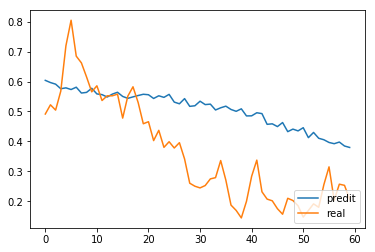

In [20]:
##Mostrem
plt.plot(predis[4], label="predit")
plt.plot(y_daily[n_train+4], label="real")
plt.legend(loc="lower right")
plt.show()

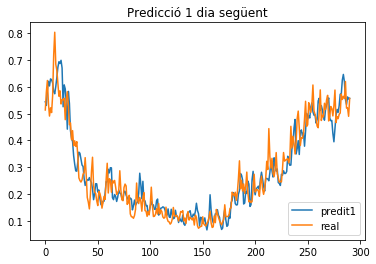

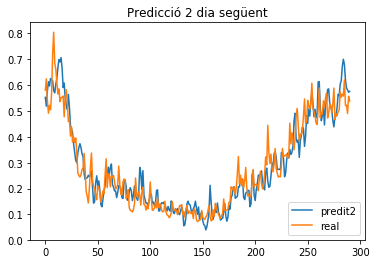

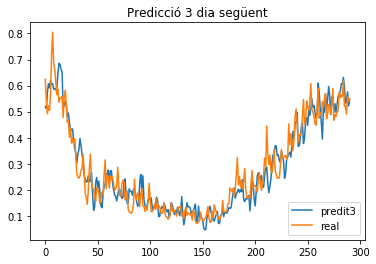

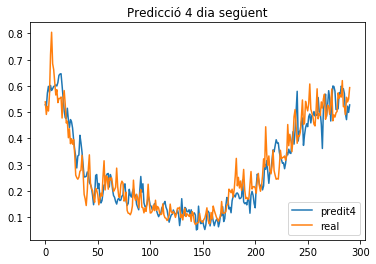

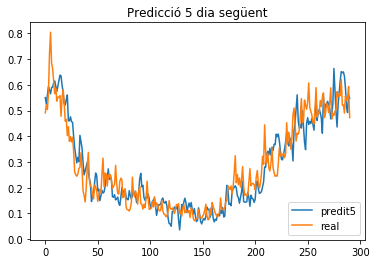

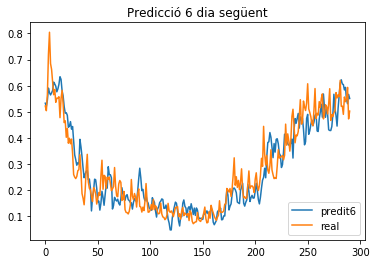

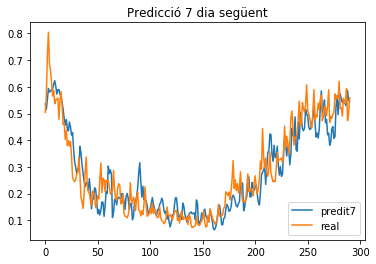

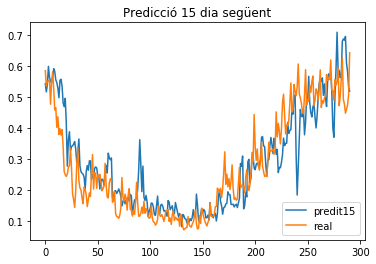

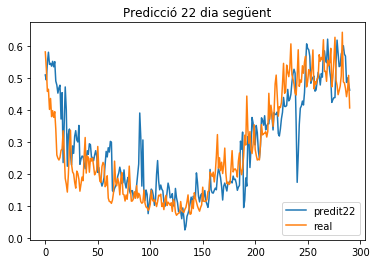

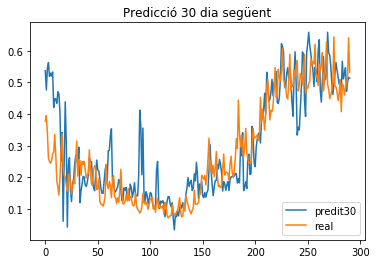

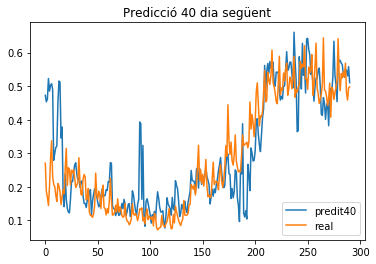

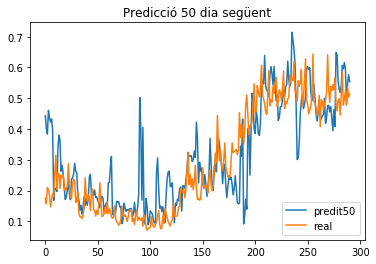

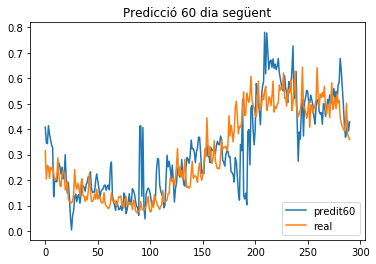

In [21]:
##Mostrem
plt.plot(llista_p0, label="predit1")
plt.plot(y_daily[n_train:lenght,0], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 1 dia següent")
plt.show()

plt.plot(llista_p1, label="predit2")
plt.plot(y_daily[n_train:lenght,1], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 2 dia següent")
plt.show()


plt.plot(llista_p2, label="predit3")
plt.plot(y_daily[n_train:lenght,2], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 3 dia següent")
plt.show()

plt.plot(llista_p3, label="predit4")
plt.plot(y_daily[n_train:lenght,3], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 4 dia següent")
plt.show()

plt.plot(llista_p4, label="predit5")
plt.plot(y_daily[n_train:lenght,4], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 5 dia següent")
plt.show()

plt.plot(llista_p5, label="predit6")
plt.plot(y_daily[n_train:lenght,5], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 6 dia següent")
plt.show()

plt.plot(llista_p6, label="predit7")
plt.plot(y_daily[n_train:lenght,6], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 7 dia següent")
plt.show()

plt.plot(llista_p14, label="predit15")
plt.plot(y_daily[n_train:lenght,14], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 15 dia següent")
plt.show()

plt.plot(llista_p21, label="predit22")
plt.plot(y_daily[n_train:lenght,21], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 22 dia següent")
plt.show()

plt.plot(llista_p29, label="predit30")
plt.plot(y_daily[n_train:lenght,29], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 30 dia següent")
plt.show()

plt.plot(llista_p39, label="predit40")
plt.plot(y_daily[n_train:lenght,39], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 40 dia següent")
plt.show()

plt.plot(llista_p49, label="predit50")
plt.plot(y_daily[n_train:lenght,49], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 50 dia següent")
plt.show()

plt.plot(llista_p59, label="predit60")
plt.plot(y_daily[n_train:lenght,59], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 60 dia següent")
plt.show()

In [22]:
llista_scores

[0.1765228285484901,
 0.15648042895193523,
 0.16982675539287803,
 0.21869364341942768,
 0.1929088491437761,
 0.195616371359466,
 0.19608060736868108,
 0.19080136317281535,
 0.12276454522722305,
 0.13721908235843852,
 0.12806475132769338,
 0.12865865664580867,
 0.16978258918706615,
 0.2046341898155501,
 0.18385950830834966,
 0.10462055680129846,
 0.13150193782965777,
 0.10530501699294721,
 0.07818619694089277,
 0.13794927183635264,
 0.09743614076143402,
 0.08646303734941208,
 0.07707594461197537,
 0.09606595296926829,
 0.08061503668342242,
 0.08453130730325376,
 0.0831512758841894,
 0.08139585542415775,
 0.09243266851310324,
 0.0905644833800072,
 0.07085003277521996,
 0.08251362003598177,
 0.10066836504415907,
 0.08904339230251579,
 0.07513421644870248,
 0.06471484789011052,
 0.0545498539994684,
 0.05250129624998097,
 0.0519159546781206,
 0.053050858347100376,
 0.05484490253760701,
 0.048975373819070946,
 0.06400645937676422,
 0.06003991854130934,
 0.04813104845780167,
 0.04016594472611

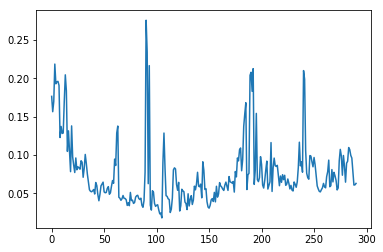

In [23]:
plt.plot(llista_scores)

In [24]:


prova=daily_dia.iloc[n_train:lenght]
prova
#len(predis)
#lenght-n_train
#prova['predi']=predis
prova['predi1']=llista_p0
prova['predi2']=llista_p1
prova['predi3']=llista_p2
prova['predi4']=llista_p3
prova['predi5']=llista_p4
prova['predi6']=llista_p5
prova['predi7']=llista_p6
prova['predi8']=llista_p7
prova['predi9']=llista_p8
prova['predi10']=llista_p9
prova['predi11']=llista_p10
prova['predi12']=llista_p11
prova['predi13']=llista_p12
prova['predi14']=llista_p13
prova['predi15']=llista_p14
prova['predi16']=llista_p15
prova['predi17']=llista_p16
prova['predi18']=llista_p17
prova['predi19']=llista_p18
prova['predi20']=llista_p19
prova['predi21']=llista_p20
prova['predi22']=llista_p21
prova['predi23']=llista_p22
prova['predi24']=llista_p23
prova['predi25']=llista_p24
prova['predi26']=llista_p25
prova['predi27']=llista_p26
prova['predi28']=llista_p27
prova['predi29']=llista_p28
prova['predi30']=llista_p29
prova['predi31']=llista_p30
prova['predi32']=llista_p31
prova['predi33']=llista_p32
prova['predi34']=llista_p33
prova['predi35']=llista_p34
prova['predi36']=llista_p35
prova['predi37']=llista_p36
prova['predi38']=llista_p37
prova['predi39']=llista_p38
prova['predi40']=llista_p39
prova['predi41']=llista_p40
prova['predi42']=llista_p41
prova['predi43']=llista_p42
prova['predi44']=llista_p43
prova['predi45']=llista_p44
prova['predi46']=llista_p45
prova['predi47']=llista_p46
prova['predi48']=llista_p47
prova['predi49']=llista_p48
prova['predi50']=llista_p49
prova['predi51']=llista_p50
prova['predi52']=llista_p51
prova['predi53']=llista_p52
prova['predi54']=llista_p53
prova['predi55']=llista_p54
prova['predi56']=llista_p55
prova['predi57']=llista_p56
prova['predi58']=llista_p57
prova['predi59']=llista_p58
prova['predi60']=llista_p59


prova['y1']=y_daily[n_train:lenght,0]
prova['y2']=y_daily[n_train:lenght,1]
prova['y3']=y_daily[n_train:lenght,2]
prova['y4']=y_daily[n_train:lenght,3]
prova['y5']=y_daily[n_train:lenght,4]
prova['y6']=y_daily[n_train:lenght,5]
prova['y7']=y_daily[n_train:lenght,6]
prova['y8']=y_daily[n_train:lenght,7]
prova['y9']=y_daily[n_train:lenght,8]
prova['y10']=y_daily[n_train:lenght,9]
prova['y11']=y_daily[n_train:lenght,10]
prova['y12']=y_daily[n_train:lenght,11]
prova['y13']=y_daily[n_train:lenght,12]
prova['y14']=y_daily[n_train:lenght,13]
prova['y15']=y_daily[n_train:lenght,14]
prova['y16']=y_daily[n_train:lenght,15]
prova['y17']=y_daily[n_train:lenght,16]
prova['y18']=y_daily[n_train:lenght,17]
prova['y19']=y_daily[n_train:lenght,18]
prova['y20']=y_daily[n_train:lenght,19]
prova['y21']=y_daily[n_train:lenght,20]
prova['y22']=y_daily[n_train:lenght,21]
prova['y23']=y_daily[n_train:lenght,22]
prova['y24']=y_daily[n_train:lenght,23]
prova['y25']=y_daily[n_train:lenght,24]
prova['y26']=y_daily[n_train:lenght,25]
prova['y27']=y_daily[n_train:lenght,26]
prova['y28']=y_daily[n_train:lenght,27]
prova['y29']=y_daily[n_train:lenght,28]
prova['y30']=y_daily[n_train:lenght,29]


prova['y31']=y_daily[n_train:lenght,20]
prova['y32']=y_daily[n_train:lenght,21]
prova['y33']=y_daily[n_train:lenght,22]
prova['y34']=y_daily[n_train:lenght,23]
prova['y35']=y_daily[n_train:lenght,24]
prova['y36']=y_daily[n_train:lenght,25]
prova['y37']=y_daily[n_train:lenght,26]
prova['y38']=y_daily[n_train:lenght,27]
prova['y39']=y_daily[n_train:lenght,28]
prova['y40']=y_daily[n_train:lenght,19]
prova['y41']=y_daily[n_train:lenght,20]
prova['y42']=y_daily[n_train:lenght,21]
prova['y43']=y_daily[n_train:lenght,22]
prova['y44']=y_daily[n_train:lenght,23]
prova['y45']=y_daily[n_train:lenght,24]
prova['y46']=y_daily[n_train:lenght,25]
prova['y47']=y_daily[n_train:lenght,26]
prova['y48']=y_daily[n_train:lenght,27]
prova['y49']=y_daily[n_train:lenght,28]
prova['y50']=y_daily[n_train:lenght,19]
prova['y51']=y_daily[n_train:lenght,20]
prova['y52']=y_daily[n_train:lenght,21]
prova['y53']=y_daily[n_train:lenght,22]
prova['y54']=y_daily[n_train:lenght,23]
prova['y55']=y_daily[n_train:lenght,24]
prova['y56']=y_daily[n_train:lenght,25]
prova['y57']=y_daily[n_train:lenght,26]
prova['y58']=y_daily[n_train:lenght,27]
prova['y59']=y_daily[n_train:lenght,28]
prova['y60']=y_daily[n_train:lenght,29]



prova=prova.drop(['energy_sum','t-1','t-2','t-3', 't-4', 't-5', 't-6', 't-7','t-8','t-9','t-10','t-11','t-12','t-13','t-14',], axis=1)
prova

prova1=prova[['predi1','predi2','predi3','predi4','predi5','predi6','predi7','predi8','predi9','predi10','predi11','predi12','predi13','predi14','y1','y2','y3','y4','y5','y6','y7','y8','y9','y10','y11','y12','y13','y14','y15','y16','y17','y18','y19','y20','y21','y22','y23','y24','y25','y26','y27','y28','y29','y30','y31','y32','y33','y34','y35','y36','y37','y38','y39','y40','y41','y42','y43','y44','y45','y46','y47','y48','y49','y50','y51','y52','y53','y54','y55','y56','y57','y58','y59','y60','y60','temp(t-1)','temp(t-2)','temp(t-3)','temp(t-4)','temp(t-5)','temp(t-6)','temp(t-7)','temp(t-8)','temp(t-9)','temp(t-10)','temp(t-11)','temp(t-12)','temp(t-13)','temp(t-14)','tempmin(t-1)','tempmin(t-2)','tempmin(t-3)','tempmin(t-4)','tempmin(t-5)','tempmin(t-6)','tempmin(t-7)','tempmin(t-8)','tempmin(t-9)','tempmin(t-10)','tempmin(t-11)','tempmin(t-12)','tempmin(t-13)','tempmin(t-14)','humidity(t-1)','humidity(t-2)','humidity(t-3)','humidity(t-4)','humidity(t-5)','humidity(t-6)','humidity(t-7)','humidity(t-8)','humidity(t-9)','humidity(t-10)','humidity(t-11)','humidity(t-12)','humidity(t-13)','humidity(t-14)']]
prova

prova2=prova[['predi15','predi16','predi17','predi18','predi19','predi20','predi21','predi22','predi23','predi24','predi25','predi26','predi27','predi28','predi29','predi30','predi31','predi32','predi33','predi34','predi35','predi36','predi37','predi38','predi39','predi40','predi41','predi42','predi43','predi44','predi45','predi46','predi47','predi48','predi49','predi50','predi51','predi52','predi53','predi54','predi55','predi56','predi57','predi58','predi59','predi60','y33','y34','y35','y36','y37','y38','y39','y40','y41','y42','y43','y44','y45','y46','y47','y48','y49','y50','y51','y52','y53','y54','y55','y56','y57','y58','y59','y60','y60','temp(t-1)','temp(t-2)','temp(t-3)','temp(t-4)','temp(t-5)','temp(t-6)','temp(t-7)','temp(t-8)','temp(t-9)','temp(t-10)','temp(t-11)','temp(t-12)','temp(t-13)','temp(t-14)','tempmin(t-1)','tempmin(t-2)','tempmin(t-3)','tempmin(t-4)','tempmin(t-5)','tempmin(t-6)','tempmin(t-7)','tempmin(t-8)','tempmin(t-9)','tempmin(t-10)','tempmin(t-11)','tempmin(t-12)','tempmin(t-13)','tempmin(t-14)','humidity(t-1)','humidity(t-2)','humidity(t-3)','humidity(t-4)','humidity(t-5)','humidity(t-6)','humidity(t-7)','humidity(t-8)','humidity(t-9)','humidity(t-10)','humidity(t-11)','humidity(t-12)','humidity(t-13)','humidity(t-14)']]

c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [25]:
#Tornem valors a normals

predi = scaler.inverse_transform(prova1)
predi2= scaler.inverse_transform(prova2)


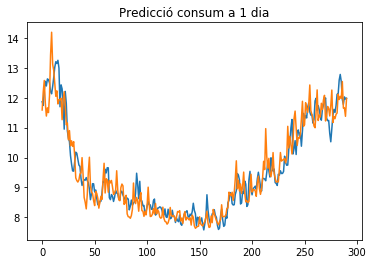

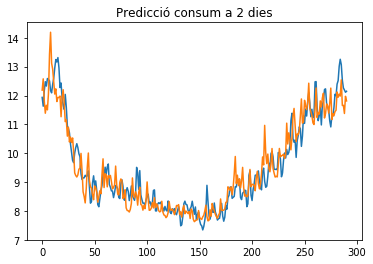

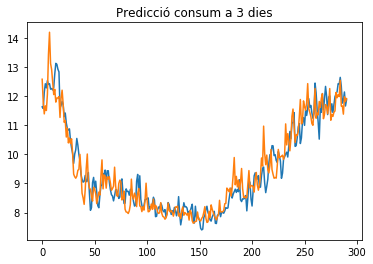

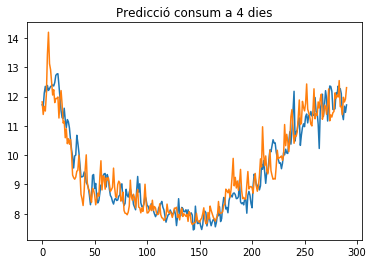

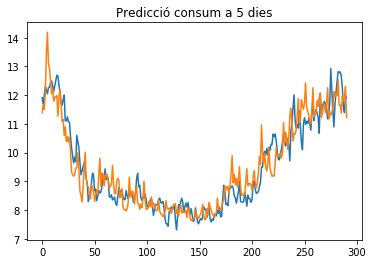

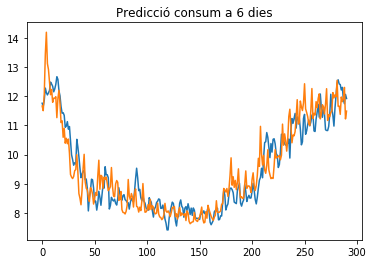

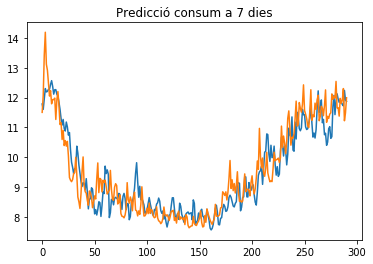

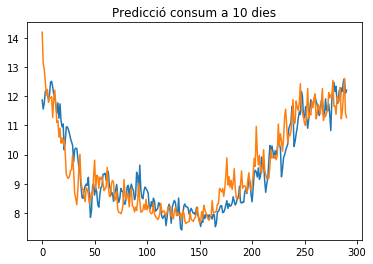

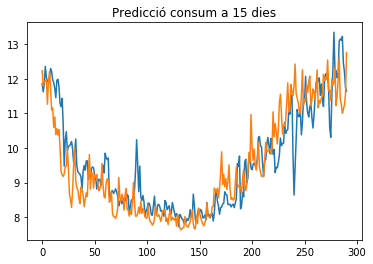

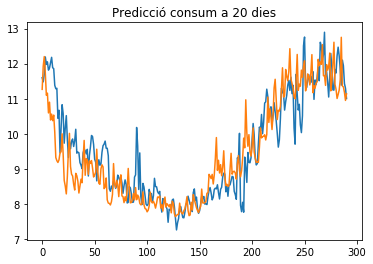

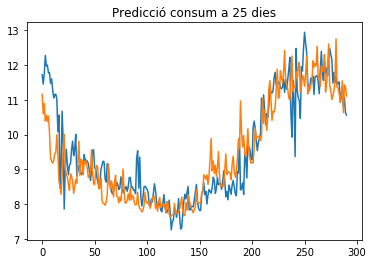

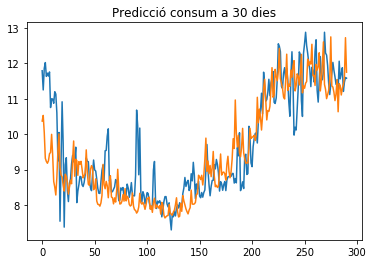

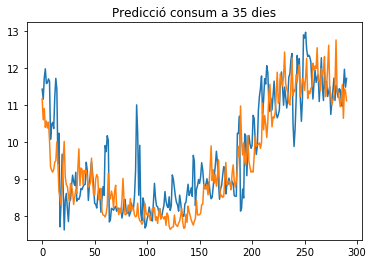

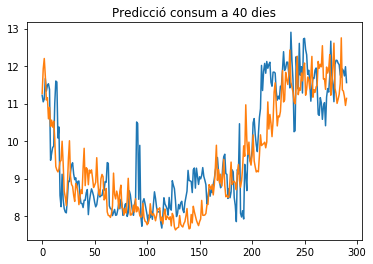

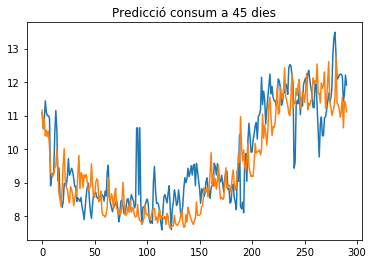

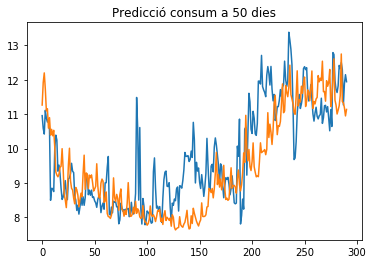

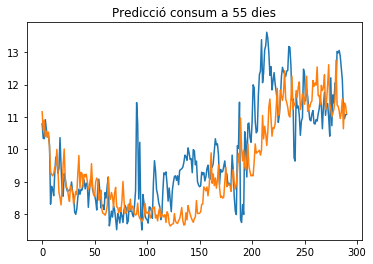

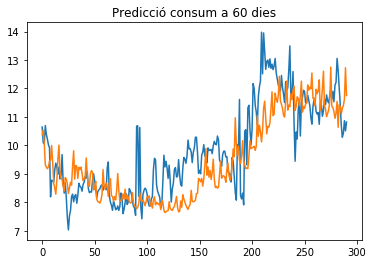

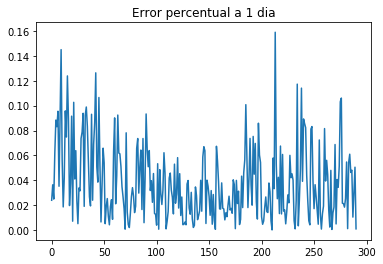

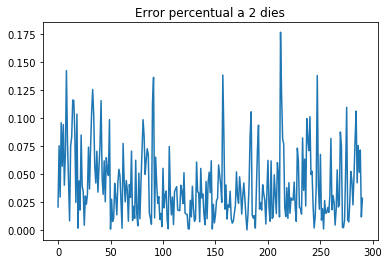

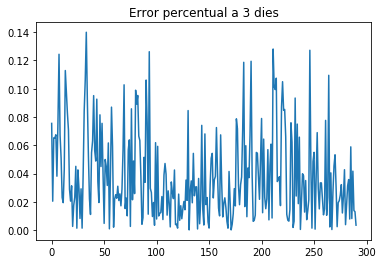

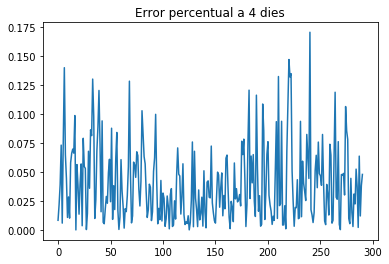

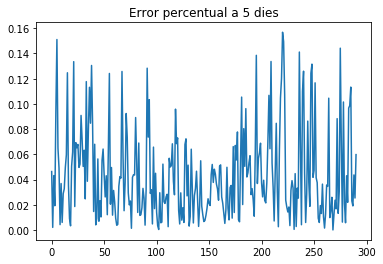

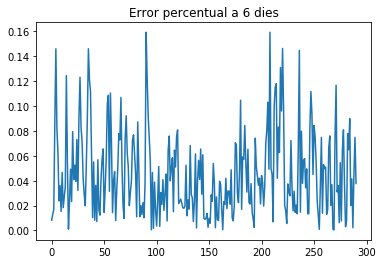

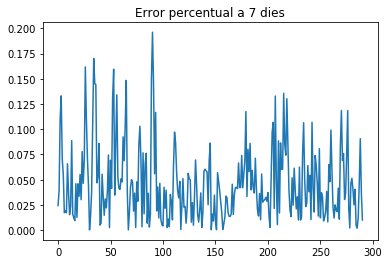

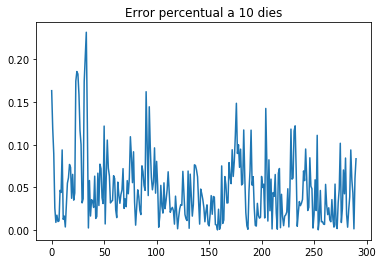

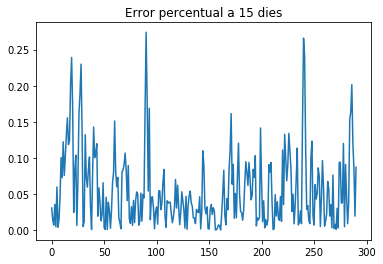

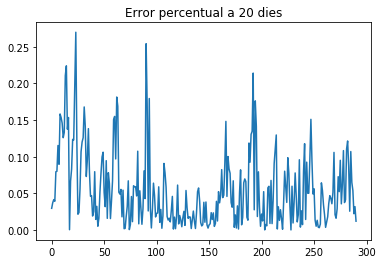

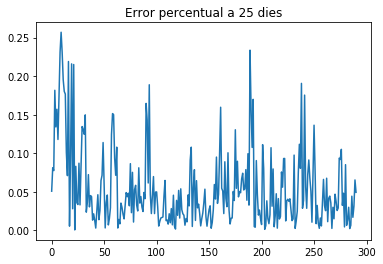

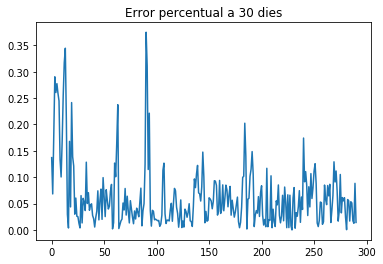

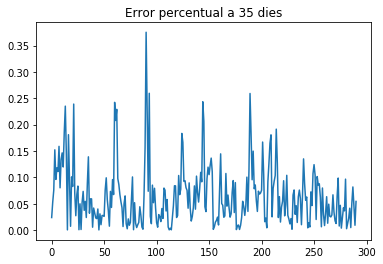

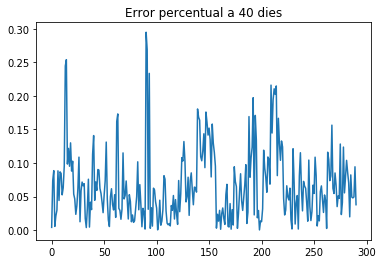

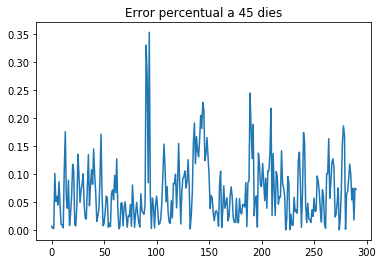

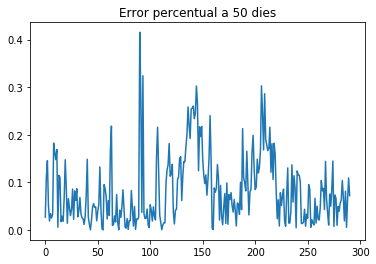

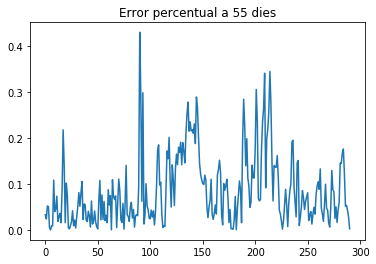

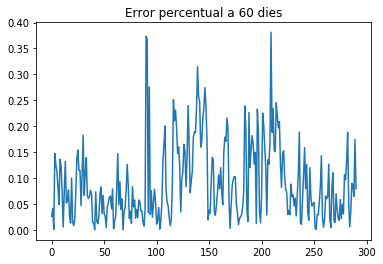

L'error mitjà a 1 dia és de 3.8180360746965833 % 
L'error mitjà a 2 dies és de 4.021558355059615 % 
L'error mitjà a 3 dies és de 3.823315277142801 % 
L'error mitjà a 4 dies és de 4.002828499436973 % 
L'error mitjà a 5 dies és de 4.384652215941731 % 
L'error mitjà a 6 dies és de 4.524344998221905 % 
L'error mitjà a 7 dies és de 4.640300206411297 % 
L'error mitjà a 8 dies és de 5.20358785853008 % 
L'error mitjà a 9 dies és de 5.194508325872169 % 
L'error mitjà a 10 dies és de 4.820609584068314 % 
L'error mitjà a 11 dies és de 4.434926852870058 % 
L'error mitjà a 12 dies és de 4.81248688649175 % 
L'error mitjà a 13 dies és de 5.0041684926517425 % 
L'error mitjà a 14 dies és de 5.320460299726722 % 
L'error mitjà a 15 dies és de 5.541704367089151 % 
L'error mitjà a 16 dies és de 5.804199072515519 % 
L'error mitjà a 17 dies és de 5.648214629218328 % 
L'error mitjà a 18 dies és de 5.44400625982978 % 
L'error mitjà a 19 dies és de 5.697707570970561 % 
L'error mitjà a 20 dies és de 5.4664652871

In [28]:
llista1=list()
llista2=list()
llista3=list()
llista4=list()
llista5=list()
llista6=list()
llista7=list()
llista8=list()
llista9=list()
llista10=list()
llista11=list()
llista12=list()
llista13=list()
llista14=list()
llista15=list()
llista16=list()
llista17=list()
llista18=list()
llista19=list()
llista20=list()
llista21=list()
llista22=list()
llista23=list()
llista24=list()
llista25=list()
llista26=list()
llista27=list()
llista28=list()
llista29=list()
llista30=list()

llista31=list()
llista32=list()
llista33=list()
llista34=list()
llista35=list()
llista36=list()
llista37=list()
llista38=list()
llista39=list()
llista40=list()
llista41=list()
llista42=list()
llista43=list()
llista44=list()
llista45=list()
llista46=list()
llista47=list()
llista48=list()
llista49=list()
llista50=list()
llista51=list()
llista52=list()
llista53=list()
llista54=list()
llista55=list()
llista56=list()
llista57=list()
llista58=list()
llista59=list()
llista60=list()


llistay1=list()
llistay2=list()
llistay3=list()
llistay4=list()
llistay5=list()
llistay6=list()
llistay7=list()
llistay8=list()
llistay9=list()
llistay10=list()
llistay11=list()
llistay12=list()
llistay13=list()
llistay14=list()
llistay15=list()
llistay16=list()
llistay17=list()
llistay18=list()
llistay19=list()
llistay20=list()
llistay21=list()
llistay22=list()
llistay23=list()
llistay24=list()
llistay25=list()
llistay26=list()
llistay27=list()
llistay28=list()
llistay29=list()
llistay30=list()
llistay31=list()
llistay32=list()
llistay33=list()
llistay34=list()
llistay35=list()
llistay36=list()
llistay37=list()
llistay38=list()
llistay39=list()
llistay40=list()
llistay41=list()
llistay42=list()
llistay43=list()
llistay44=list()
llistay45=list()
llistay46=list()
llistay47=list()
llistay48=list()
llistay49=list()
llistay50=list()
llistay51=list()
llistay52=list()
llistay53=list()
llistay54=list()
llistay55=list()
llistay56=list()
llistay57=list()
llistay58=list()
llistay59=list()
llistay60=list()

llista_errors1=list()
llista_errorsabs1=list()
llista_errorsres1=list()


llista_errors2=list()
llista_errorsabs2=list()
llista_errorsres2=list()


llista_errors3=list()
llista_errorsabs3=list()
llista_errorsres3=list()

llista_errors4=list()
llista_errorsabs4=list()
llista_errorsres4=list()

llista_errors5=list()
llista_errorsabs5=list()
llista_errorsres5=list()

llista_errors6=list()
llista_errorsabs6=list()
llista_errorsres6=list()

llista_errors7=list()
llista_errorsabs7=list()
llista_errorsres7=list()

llista_errors10=list()
llista_errorsabs10=list()
llista_errorsres10=list()

llista_errors15=list()
llista_errorsabs15=list()
llista_errorsres15=list()

llista_errors20=list()
llista_errorsabs20=list()
llista_errorsres20=list()

llista_errors25=list()
llista_errorsabs25=list()
llista_errorsres25=list()

llista_errors30=list()
llista_errorsabs30=list()
llista_errorsres30=list()

llista_errors35=list()
llista_errorsabs35=list()
llista_errorsres35=list()

llista_errors40=list()
llista_errorsabs40=list()
llista_errorsres40=list()

llista_errors45=list()
llista_errorsabs45=list()
llista_errorsres45=list()

llista_errors50=list()
llista_errorsabs50=list()
llista_errorsres50=list()

llista_errors55=list()
llista_errorsabs55=list()
llista_errorsres55=list()

llista_errors60=list()
llista_errorsabs60=list()
llista_errorsres60=list()

llista_errorsres8=list()
llista_errorsres9=list()
llista_errorsres11=list()
llista_errorsres12=list()
llista_errorsres13=list()
llista_errorsres14=list()
llista_errorsres16=list()
llista_errorsres17=list()
llista_errorsres18=list()
llista_errorsres19=list()
llista_errorsres21=list()
llista_errorsres22=list()
llista_errorsres23=list()
llista_errorsres24=list()
llista_errorsres26=list()
llista_errorsres27=list()
llista_errorsres28=list()
llista_errorsres29=list()
llista_errorsres31=list()
llista_errorsres32=list()
llista_errorsres33=list()
llista_errorsres34=list()
llista_errorsres36=list()
llista_errorsres37=list()
llista_errorsres38=list()
llista_errorsres39=list()
llista_errorsres41=list()
llista_errorsres42=list()
llista_errorsres43=list()
llista_errorsres44=list()
llista_errorsres46=list()
llista_errorsres47=list()
llista_errorsres48=list()
llista_errorsres49=list()
llista_errorsres51=list()
llista_errorsres52=list()
llista_errorsres53=list()
llista_errorsres54=list()
llista_errorsres56=list()
llista_errorsres57=list()
llista_errorsres58=list()
llista_errorsres59=list()

    
for i in range(len(predi)):
    
    llista1.append(predi[i][0])
    llista2.append(predi[i][1])
    llista3.append(predi[i][2])
    llista4.append(predi[i][3])
    llista5.append(predi[i][4])
    llista6.append(predi[i][5])
    llista7.append(predi[i][6])
    llista8.append(predi[i][7])
    llista9.append(predi[i][8])
    llista10.append(predi[i][9])
    llista11.append(predi[i][10])
    llista12.append(predi[i][11])
    llista13.append(predi[i][12])
    llista14.append(predi[i][13])
    
    llistay1.append(predi[i][14])
    llistay2.append(predi[i][15])
    llistay3.append(predi[i][16])
    llistay4.append(predi[i][17])
    llistay5.append(predi[i][18])
    llistay6.append(predi[i][19])
    llistay7.append(predi[i][20])
    llistay8.append(predi[i][21])
    llistay9.append(predi[i][22])
    llistay10.append(predi[i][23])
    llistay11.append(predi[i][24])
    llistay12.append(predi[i][25])
    llistay13.append(predi[i][26])
    llistay14.append(predi[i][27])
    llistay15.append(predi[i][28])
    llistay16.append(predi[i][29])
    llistay17.append(predi[i][30])
    llistay18.append(predi[i][31])
    llistay19.append(predi[i][32]) 
    llistay20.append(predi[i][33])
    llistay21.append(predi[i][34])
    llistay22.append(predi[i][35])
    llistay23.append(predi[i][36])
    llistay24.append(predi[i][37])
    llistay25.append(predi[i][38])
    llistay26.append(predi[i][39])
    llistay27.append(predi[i][40])
    llistay28.append(predi[i][41])
    llistay29.append(predi[i][42])
    llistay30.append(predi[i][43])
   

    llistay31.append(predi[i][44])
    llistay32.append(predi[i][45])
    llistay33.append(predi[i][46])
    llistay34.append(predi[i][47])
    llistay35.append(predi[i][48])
    llistay36.append(predi[i][49])
    llistay37.append(predi[i][50])
    llistay38.append(predi[i][51])
    llistay39.append(predi[i][52])
    llistay40.append(predi[i][53])
    llistay41.append(predi[i][54])
    llistay42.append(predi[i][55])
    llistay43.append(predi[i][56])
    llistay44.append(predi[i][57])
    llistay45.append(predi[i][58])
    llistay46.append(predi[i][59])
    llistay47.append(predi[i][60])
    llistay48.append(predi[i][61])
    llistay49.append(predi[i][62])
    llistay50.append(predi[i][63])
    llistay51.append(predi[i][64])
    llistay52.append(predi[i][65])
    llistay53.append(predi[i][66])
    llistay54.append(predi[i][67])
    llistay55.append(predi[i][68])
    llistay56.append(predi[i][69])
    llistay57.append(predi[i][70])
    llistay58.append(predi[i][71])
    llistay59.append(predi[i][72])
    llistay60.append(predi[i][73])






    llista15.append(predi2[i][0])
    llista16.append(predi2[i][1])
    llista17.append(predi2[i][2])
    llista18.append(predi2[i][3])
    llista19.append(predi2[i][4])
    llista20.append(predi2[i][5])
    llista21.append(predi2[i][6])
    llista22.append(predi2[i][7])
    llista23.append(predi2[i][8])
    llista24.append(predi2[i][9])
    llista25.append(predi2[i][10])
    llista26.append(predi2[i][11])
    llista27.append(predi2[i][12])
    llista28.append(predi2[i][13]) 
    llista29.append(predi2[i][14])    
    llista30.append(predi2[i][15]) 
    llista31.append(predi2[i][16])
    llista32.append(predi2[i][17])
    llista33.append(predi2[i][18])
    llista34.append(predi2[i][19])
    llista35.append(predi2[i][20])
    llista36.append(predi2[i][21])
    llista37.append(predi2[i][22])
    llista38.append(predi2[i][23]) 
    llista39.append(predi2[i][24])    
    llista40.append(predi2[i][25]) 
    llista41.append(predi2[i][26])
    llista42.append(predi2[i][27])
    llista43.append(predi2[i][28])
    llista44.append(predi2[i][29])
    llista45.append(predi2[i][30])
    llista46.append(predi2[i][31])
    llista47.append(predi2[i][32])
    llista48.append(predi2[i][33]) 
    llista49.append(predi2[i][34])    
    llista50.append(predi2[i][35]) 
    llista51.append(predi2[i][36])
    llista52.append(predi2[i][37])
    llista53.append(predi2[i][38])
    llista54.append(predi2[i][39])
    llista55.append(predi2[i][40])
    llista56.append(predi2[i][41])
    llista57.append(predi2[i][42])
    llista58.append(predi2[i][43]) 
    llista59.append(predi2[i][44])    
    llista60.append(predi2[i][45]) 
    
    
    valor1=llistay1[i] - llista1[i]
    valorabs1=math.fabs(valor1)
    valorrespecte1=valorabs1/llistay1[i]
    llista_errors1.append(valor1)
    llista_errorsabs1.append(valorabs1)
    llista_errorsres1.append(valorrespecte1)
    
    valor2=llistay2[i] - llista2[i]
    valorabs2=math.fabs(valor2)
    valorrespecte2=valorabs2/llistay2[i]
    llista_errors2.append(valor2)
    llista_errorsabs2.append(valorabs2)
    llista_errorsres2.append(valorrespecte2)
    
    valor3=llistay3[i] - llista3[i]
    valorabs3=math.fabs(valor3)
    valorrespecte3=valorabs3/llistay3[i]
    llista_errors3.append(valor3)
    llista_errorsabs3.append(valorabs3)
    llista_errorsres3.append(valorrespecte3)
    
    valor4=llistay4[i] - llista4[i]
    valorabs4=math.fabs(valor4)
    valorrespecte4=valorabs4/llistay4[i]
    llista_errors4.append(valor4)
    llista_errorsabs4.append(valorabs4)
    llista_errorsres4.append(valorrespecte4)
    
    valor5=llistay5[i] - llista5[i]
    valorabs5=math.fabs(valor5)
    valorrespecte5=valorabs5/llistay5[i]
    llista_errors5.append(valor5)
    llista_errorsabs5.append(valorabs5)
    llista_errorsres5.append(valorrespecte5)
    
    valor6=llistay6[i] - llista6[i]
    valorabs6=math.fabs(valor6)
    valorrespecte6=valorabs6/llistay6[i]
    llista_errors6.append(valor6)
    llista_errorsabs6.append(valorabs6)
    llista_errorsres6.append(valorrespecte6)
    
    valor7=llistay7[i] - llista7[i]
    valorabs7=math.fabs(valor7)
    valorrespecte7=valorabs7/llistay7[i]
    llista_errors7.append(valor7)
    llista_errorsabs7.append(valorabs7)
    llista_errorsres7.append(valorrespecte7)
    
    valor8=llistay8[i] - llista8[i]
    valorabs8=math.fabs(valor8)
    valorrespecte8=valorabs8/llistay8[i]
    llista_errorsres8.append(valorrespecte8)
    
    valor9=llistay9[i] - llista9[i]
    valorabs9=math.fabs(valor9)
    valorrespecte9=valorabs9/llistay9[i]
    llista_errorsres9.append(valorrespecte9)
    
    
    valor10=llistay10[i] - llista10[i]
    valorabs10=math.fabs(valor10)
    valorrespecte10=valorabs10/llistay10[i]
    llista_errors10.append(valor10)
    llista_errorsabs10.append(valorabs10)
    llista_errorsres10.append(valorrespecte10)
    
    
    valor11=llistay11[i] - llista11[i]
    valorabs11=math.fabs(valor11)
    valorrespecte11=valorabs11/llistay11[i]
    llista_errorsres11.append(valorrespecte11)
    
    valor12=llistay12[i] - llista12[i]
    valorabs12=math.fabs(valor12)
    valorrespecte12=valorabs12/llistay12[i]
    llista_errorsres12.append(valorrespecte12)
    
    valor13=llistay13[i] - llista13[i]
    valorabs13=math.fabs(valor13)
    valorrespecte13=valorabs13/llistay13[i]
    llista_errorsres13.append(valorrespecte13)
    
    valor14=llistay14[i] - llista14[i]
    valorabs14=math.fabs(valor14)
    valorrespecte14=valorabs14/llistay14[i]
    llista_errorsres14.append(valorrespecte14)
    
    valor15=llistay15[i] - llista15[i]
    valorabs15=math.fabs(valor15)
    valorrespecte15=valorabs15/llistay15[i]
    llista_errors15.append(valor15)
    llista_errorsabs15.append(valorabs15)
    llista_errorsres15.append(valorrespecte15)
    
    
    valor16=llistay16[i] - llista16[i]
    valorabs16=math.fabs(valor16)
    valorrespecte16=valorabs16/llistay16[i]
    llista_errorsres16.append(valorrespecte16)
    
    valor17=llistay17[i] - llista17[i]
    valorabs17=math.fabs(valor17)
    valorrespecte17=valorabs17/llistay17[i]
    llista_errorsres17.append(valorrespecte17)
    
    valor18=llistay18[i] - llista18[i]
    valorabs18=math.fabs(valor18)
    valorrespecte18=valorabs18/llistay18[i]
    llista_errorsres18.append(valorrespecte18)
    
    valor19=llistay19[i] - llista19[i]
    valorabs19=math.fabs(valor19)
    valorrespecte19=valorabs19/llistay19[i]
    llista_errorsres19.append(valorrespecte19)
    
    valor20=llistay20[i] - llista20[i]
    valorabs20=math.fabs(valor20)
    valorrespecte20=valorabs20/llistay20[i]
    llista_errors20.append(valor20)
    llista_errorsabs20.append(valorabs20)
    llista_errorsres20.append(valorrespecte20)
    
    valor25=llistay25[i] - llista25[i]
    valorabs25=math.fabs(valor25)
    valorrespecte25=valorabs25/llistay25[i]
    llista_errors25.append(valor25)
    llista_errorsabs25.append(valorabs25)
    llista_errorsres25.append(valorrespecte25)
    
    valor30=llistay30[i] - llista30[i]
    valorabs30=math.fabs(valor30)
    valorrespecte30=valorabs30/llistay30[i]
    llista_errors30.append(valor30)
    llista_errorsabs30.append(valorabs30)
    llista_errorsres30.append(valorrespecte30)
    
    valor35=llistay35[i] - llista35[i]
    valorabs35=math.fabs(valor35)
    valorrespecte35=valorabs35/llistay35[i]
    llista_errors35.append(valor35)
    llista_errorsabs35.append(valorabs35)
    llista_errorsres35.append(valorrespecte35)
    
    valor40=llistay40[i] - llista40[i]
    valorabs40=math.fabs(valor40)
    valorrespecte40=valorabs40/llistay40[i]
    llista_errors40.append(valor40)
    llista_errorsabs40.append(valorabs40)
    llista_errorsres40.append(valorrespecte40)
    
    valor45=llistay45[i] - llista45[i]
    valorabs45=math.fabs(valor45)
    valorrespecte45=valorabs45/llistay45[i]
    llista_errors45.append(valor45)
    llista_errorsabs45.append(valorabs45)
    llista_errorsres45.append(valorrespecte45)
    
    valor50=llistay50[i] - llista50[i]
    valorabs50=math.fabs(valor50)
    valorrespecte50=valorabs50/llistay50[i]
    llista_errors50.append(valor50)
    llista_errorsabs50.append(valorabs50)
    llista_errorsres50.append(valorrespecte50)
    
    valor55=llistay55[i] - llista55[i]
    valorabs55=math.fabs(valor55)
    valorrespecte55=valorabs55/llistay55[i]
    llista_errors55.append(valor55)
    llista_errorsabs55.append(valorabs55)
    llista_errorsres55.append(valorrespecte55)
    
    valor60=llistay60[i] - llista60[i]
    valorabs60=math.fabs(valor60)
    valorrespecte60=valorabs60/llistay60[i]
    llista_errors60.append(valor60)
    llista_errorsabs60.append(valorabs60)
    llista_errorsres60.append(valorrespecte60)
    
    
    
    
    valor21=llistay21[i] - llista21[i]
    valorabs21=math.fabs(valor21)
    valorrespecte21=valorabs21/llistay21[i]
    llista_errorsres21.append(valorrespecte21)
    
    valor22=llistay22[i] - llista22[i]
    valorabs22=math.fabs(valor22)
    valorrespecte22=valorabs22/llistay22[i]
    llista_errorsres22.append(valorrespecte22)
    
    valor23=llistay23[i] - llista23[i]
    valorabs23=math.fabs(valor23)
    valorrespecte23=valorabs23/llistay23[i]
    llista_errorsres23.append(valorrespecte23)
    
    valor24=llistay24[i] - llista24[i]
    valorabs24=math.fabs(valor24)
    valorrespecte24=valorabs24/llistay24[i]
    llista_errorsres24.append(valorrespecte24)
    
    valor26=llistay26[i] - llista26[i]
    valorabs26=math.fabs(valor26)
    valorrespecte26=valorabs26/llistay26[i]
    llista_errorsres26.append(valorrespecte26)
    
    valor27=llistay27[i] - llista27[i]
    valorabs27=math.fabs(valor27)
    valorrespecte27=valorabs27/llistay27[i]
    llista_errorsres27.append(valorrespecte27)
    
    valor28=llistay28[i] - llista28[i]
    valorabs28=math.fabs(valor28)
    valorrespecte28=valorabs28/llistay28[i]
    llista_errorsres28.append(valorrespecte28)
    
    valor29=llistay29[i] - llista29[i]
    valorabs29=math.fabs(valor29)
    valorrespecte29=valorabs29/llistay29[i]
    llista_errorsres29.append(valorrespecte29)
    
    
    
    
    
    valor31=llistay31[i] - llista31[i]
    valorabs31=math.fabs(valor31)
    valorrespecte31=valorabs31/llistay31[i]
    llista_errorsres31.append(valorrespecte31)
    
    valor32=llistay32[i] - llista32[i]
    valorabs32=math.fabs(valor32)
    valorrespecte32=valorabs32/llistay32[i]
    llista_errorsres32.append(valorrespecte32)
    
    valor33=llistay33[i] - llista33[i]
    valorabs33=math.fabs(valor33)
    valorrespecte33=valorabs33/llistay33[i]
    llista_errorsres33.append(valorrespecte33)
    
    valor34=llistay34[i] - llista34[i]
    valorabs34=math.fabs(valor34)
    valorrespecte34=valorabs34/llistay34[i]
    llista_errorsres34.append(valorrespecte34)
    
    valor36=llistay36[i] - llista36[i]
    valorabs36=math.fabs(valor36)
    valorrespecte36=valorabs36/llistay36[i]
    llista_errorsres36.append(valorrespecte36)
    
    valor37=llistay37[i] - llista37[i]
    valorabs37=math.fabs(valor37)
    valorrespecte37=valorabs37/llistay37[i]
    llista_errorsres37.append(valorrespecte37)
    
    valor38=llistay38[i] - llista38[i]
    valorabs38=math.fabs(valor38)
    valorrespecte38=valorabs38/llistay38[i]
    llista_errorsres38.append(valorrespecte38)
    
    valor39=llistay39[i] - llista39[i]
    valorabs39=math.fabs(valor39)
    valorrespecte39=valorabs39/llistay39[i]
    llista_errorsres39.append(valorrespecte39)
    
    
    
    valor41=llistay41[i] - llista41[i]
    valorabs41=math.fabs(valor41)
    valorrespecte41=valorabs41/llistay41[i]
    llista_errorsres41.append(valorrespecte41)
    
    valor42=llistay42[i] - llista42[i]
    valorabs42=math.fabs(valor42)
    valorrespecte42=valorabs42/llistay42[i]
    llista_errorsres42.append(valorrespecte42)
    
    valor43=llistay43[i] - llista43[i]
    valorabs43=math.fabs(valor43)
    valorrespecte43=valorabs43/llistay43[i]
    llista_errorsres43.append(valorrespecte43)
    
    valor44=llistay44[i] - llista44[i]
    valorabs44=math.fabs(valor44)
    valorrespecte44=valorabs44/llistay44[i]
    llista_errorsres44.append(valorrespecte44)
    
    valor46=llistay46[i] - llista46[i]
    valorabs46=math.fabs(valor46)
    valorrespecte46=valorabs46/llistay46[i]
    llista_errorsres46.append(valorrespecte46)
    
    valor47=llistay47[i] - llista47[i]
    valorabs47=math.fabs(valor47)
    valorrespecte47=valorabs47/llistay47[i]
    llista_errorsres47.append(valorrespecte47)
    
    valor48=llistay48[i] - llista48[i]
    valorabs48=math.fabs(valor48)
    valorrespecte48=valorabs48/llistay48[i]
    llista_errorsres48.append(valorrespecte48)
    
    valor49=llistay49[i] - llista49[i]
    valorabs49=math.fabs(valor49)
    valorrespecte49=valorabs49/llistay49[i]
    llista_errorsres49.append(valorrespecte49)
    
    
    
    
    valor51=llistay51[i] - llista51[i]
    valorabs51=math.fabs(valor51)
    valorrespecte51=valorabs51/llistay51[i]
    llista_errorsres51.append(valorrespecte51)
    
    valor52=llistay52[i] - llista52[i]
    valorabs52=math.fabs(valor52)
    valorrespecte52=valorabs52/llistay52[i]
    llista_errorsres52.append(valorrespecte52)
    
    valor53=llistay53[i] - llista53[i]
    valorabs53=math.fabs(valor53)
    valorrespecte53=valorabs53/llistay53[i]
    llista_errorsres53.append(valorrespecte53)
    
    valor54=llistay54[i] - llista54[i]
    valorabs54=math.fabs(valor54)
    valorrespecte54=valorabs54/llistay54[i]
    llista_errorsres54.append(valorrespecte54)
    
    valor56=llistay56[i] - llista56[i]
    valorabs56=math.fabs(valor56)
    valorrespecte56=valorabs56/llistay56[i]
    llista_errorsres56.append(valorrespecte56)
    
    valor57=llistay57[i] - llista57[i]
    valorabs57=math.fabs(valor57)
    valorrespecte57=valorabs57/llistay57[i]
    llista_errorsres57.append(valorrespecte57)
    
    valor58=llistay58[i] - llista58[i]
    valorabs58=math.fabs(valor58)
    valorrespecte58=valorabs58/llistay58[i]
    llista_errorsres58.append(valorrespecte58)
    
    valor59=llistay59[i] - llista59[i]
    valorabs59=math.fabs(valor59)
    valorrespecte59=valorabs59/llistay59[i]
    llista_errorsres59.append(valorrespecte59)
    
    
    
    
plt.plot(llista1)
plt.plot(llistay1)
plt.title("Predicció consum a 1 dia")
plt.show()

plt.plot(llista2)
plt.plot(llistay2)
plt.title("Predicció consum a 2 dies")
plt.show()

plt.plot(llista3)
plt.plot(llistay3)
plt.title("Predicció consum a 3 dies")
plt.show()

plt.plot(llista4)
plt.plot(llistay4)
plt.title("Predicció consum a 4 dies")
plt.show()

plt.plot(llista5)
plt.plot(llistay5)
plt.title("Predicció consum a 5 dies")
plt.show()

plt.plot(llista6)
plt.plot(llistay6)
plt.title("Predicció consum a 6 dies")
plt.show()

plt.plot(llista7)
plt.plot(llistay7)
plt.title("Predicció consum a 7 dies")
plt.show()

plt.plot(llista10)
plt.plot(llistay10)
plt.title("Predicció consum a 10 dies")
plt.show()

plt.plot(llista15)
plt.plot(llistay15)
plt.title("Predicció consum a 15 dies")
plt.show()

plt.plot(llista20)
plt.plot(llistay20)
plt.title("Predicció consum a 20 dies")
plt.show()

plt.plot(llista25)
plt.plot(llistay25)
plt.title("Predicció consum a 25 dies")
plt.show()

plt.plot(llista30)
plt.plot(llistay30)
plt.title("Predicció consum a 30 dies")
plt.show()



plt.plot(llista35)
plt.plot(llistay35)
plt.title("Predicció consum a 35 dies")
plt.show()

plt.plot(llista40)
plt.plot(llistay40)
plt.title("Predicció consum a 40 dies")
plt.show()

plt.plot(llista45)
plt.plot(llistay45)
plt.title("Predicció consum a 45 dies")
plt.show()

plt.plot(llista50)
plt.plot(llistay50)
plt.title("Predicció consum a 50 dies")
plt.show()

plt.plot(llista55)
plt.plot(llistay55)
plt.title("Predicció consum a 55 dies")
plt.show()

plt.plot(llista60)
plt.plot(llistay60)
plt.title("Predicció consum a 60 dies")
plt.show()


plt.plot(llista_errorsres1)
plt.title("Error percentual a 1 dia")
plt.show()
plt.plot(llista_errorsres2)
plt.title("Error percentual a 2 dies")
plt.show()
plt.plot(llista_errorsres3)
plt.title("Error percentual a 3 dies")
plt.show()
plt.plot(llista_errorsres4)
plt.title("Error percentual a 4 dies")
plt.show()
plt.plot(llista_errorsres5)
plt.title("Error percentual a 5 dies")
plt.show()
plt.plot(llista_errorsres6)
plt.title("Error percentual a 6 dies")
plt.show()
plt.plot(llista_errorsres7)
plt.title("Error percentual a 7 dies")
plt.show()
plt.plot(llista_errorsres10)
plt.title("Error percentual a 10 dies")
plt.show()
plt.plot(llista_errorsres15)
plt.title("Error percentual a 15 dies")
plt.show()
plt.plot(llista_errorsres20)
plt.title("Error percentual a 20 dies")
plt.show()
plt.plot(llista_errorsres25)
plt.title("Error percentual a 25 dies")
plt.show()
plt.plot(llista_errorsres30)
plt.title("Error percentual a 30 dies")
plt.show()

plt.plot(llista_errorsres35)
plt.title("Error percentual a 35 dies")
plt.show()
plt.plot(llista_errorsres40)
plt.title("Error percentual a 40 dies")
plt.show()

plt.plot(llista_errorsres45)
plt.title("Error percentual a 45 dies")
plt.show()
plt.plot(llista_errorsres50)
plt.title("Error percentual a 50 dies")
plt.show()

plt.plot(llista_errorsres55)
plt.title("Error percentual a 55 dies")
plt.show()

plt.plot(llista_errorsres60)
plt.title("Error percentual a 60 dies")
plt.show()

error_mitja1=sum(llista_errorsres1)/(len(llista_errorsres1))*100
error_mitja2=sum(llista_errorsres2)/(len(llista_errorsres2))*100
error_mitja3=sum(llista_errorsres3)/(len(llista_errorsres3))*100
error_mitja4=sum(llista_errorsres4)/(len(llista_errorsres4))*100
error_mitja5=sum(llista_errorsres5)/(len(llista_errorsres5))*100
error_mitja6=sum(llista_errorsres6)/(len(llista_errorsres6))*100
error_mitja7=sum(llista_errorsres7)/(len(llista_errorsres7))*100
error_mitja8=sum(llista_errorsres8)/(len(llista_errorsres8))*100
error_mitja9=sum(llista_errorsres9)/(len(llista_errorsres9))*100
error_mitja10=sum(llista_errorsres10)/(len(llista_errorsres10))*100
error_mitja11=sum(llista_errorsres11)/(len(llista_errorsres11))*100
error_mitja12=sum(llista_errorsres12)/(len(llista_errorsres12))*100
error_mitja13=sum(llista_errorsres13)/(len(llista_errorsres13))*100
error_mitja14=sum(llista_errorsres14)/(len(llista_errorsres14))*100

error_mitja15=sum(llista_errorsres15)/(len(llista_errorsres15))*100
error_mitja16=sum(llista_errorsres16)/(len(llista_errorsres16))*100
error_mitja17=sum(llista_errorsres17)/(len(llista_errorsres17))*100
error_mitja18=sum(llista_errorsres18)/(len(llista_errorsres18))*100
error_mitja19=sum(llista_errorsres19)/(len(llista_errorsres19))*100

error_mitja20=sum(llista_errorsres20)/(len(llista_errorsres20))*100
error_mitja21=sum(llista_errorsres21)/(len(llista_errorsres21))*100
error_mitja22=sum(llista_errorsres22)/(len(llista_errorsres22))*100
error_mitja23=sum(llista_errorsres23)/(len(llista_errorsres23))*100
error_mitja24=sum(llista_errorsres24)/(len(llista_errorsres24))*100
error_mitja25=sum(llista_errorsres25)/(len(llista_errorsres25))*100
error_mitja26=sum(llista_errorsres26)/(len(llista_errorsres26))*100
error_mitja27=sum(llista_errorsres27)/(len(llista_errorsres27))*100
error_mitja28=sum(llista_errorsres28)/(len(llista_errorsres28))*100
error_mitja29=sum(llista_errorsres29)/(len(llista_errorsres29))*100
error_mitja30=sum(llista_errorsres30)/(len(llista_errorsres30))*100



error_mitja31=sum(llista_errorsres31)/(len(llista_errorsres31))*100
error_mitja32=sum(llista_errorsres32)/(len(llista_errorsres32))*100
error_mitja33=sum(llista_errorsres33)/(len(llista_errorsres33))*100
error_mitja34=sum(llista_errorsres34)/(len(llista_errorsres34))*100
error_mitja36=sum(llista_errorsres36)/(len(llista_errorsres36))*100
error_mitja37=sum(llista_errorsres37)/(len(llista_errorsres37))*100
error_mitja38=sum(llista_errorsres38)/(len(llista_errorsres38))*100
error_mitja39=sum(llista_errorsres39)/(len(llista_errorsres39))*100
error_mitja41=sum(llista_errorsres41)/(len(llista_errorsres41))*100
error_mitja42=sum(llista_errorsres42)/(len(llista_errorsres42))*100
error_mitja43=sum(llista_errorsres43)/(len(llista_errorsres43))*100
error_mitja44=sum(llista_errorsres44)/(len(llista_errorsres44))*100
error_mitja46=sum(llista_errorsres46)/(len(llista_errorsres46))*100
error_mitja47=sum(llista_errorsres47)/(len(llista_errorsres47))*100
error_mitja48=sum(llista_errorsres48)/(len(llista_errorsres48))*100
error_mitja49=sum(llista_errorsres49)/(len(llista_errorsres49))*100

error_mitja51=sum(llista_errorsres51)/(len(llista_errorsres51))*100
error_mitja52=sum(llista_errorsres52)/(len(llista_errorsres52))*100
error_mitja53=sum(llista_errorsres53)/(len(llista_errorsres53))*100
error_mitja54=sum(llista_errorsres54)/(len(llista_errorsres54))*100
error_mitja56=sum(llista_errorsres56)/(len(llista_errorsres56))*100
error_mitja57=sum(llista_errorsres57)/(len(llista_errorsres57))*100
error_mitja58=sum(llista_errorsres58)/(len(llista_errorsres58))*100
error_mitja59=sum(llista_errorsres59)/(len(llista_errorsres59))*100



error_mitja35=sum(llista_errorsres35)/(len(llista_errorsres35))*100
error_mitja40=sum(llista_errorsres40)/(len(llista_errorsres40))*100
error_mitja45=sum(llista_errorsres45)/(len(llista_errorsres45))*100
error_mitja50=sum(llista_errorsres50)/(len(llista_errorsres50))*100
error_mitja55=sum(llista_errorsres55)/(len(llista_errorsres55))*100
error_mitja60=sum(llista_errorsres60)/(len(llista_errorsres60))*100

print("L'error mitjà a 1 dia és de {} % " .format(error_mitja1))
print("L'error mitjà a 2 dies és de {} % " .format(error_mitja2))
print("L'error mitjà a 3 dies és de {} % " .format(error_mitja3))
print("L'error mitjà a 4 dies és de {} % " .format(error_mitja4))
print("L'error mitjà a 5 dies és de {} % " .format(error_mitja5))
print("L'error mitjà a 6 dies és de {} % " .format(error_mitja6))
print("L'error mitjà a 7 dies és de {} % " .format(error_mitja7))
print("L'error mitjà a 8 dies és de {} % " .format(error_mitja8))
print("L'error mitjà a 9 dies és de {} % " .format(error_mitja9))
print("L'error mitjà a 10 dies és de {} % " .format(error_mitja10))
print("L'error mitjà a 11 dies és de {} % " .format(error_mitja11))
print("L'error mitjà a 12 dies és de {} % " .format(error_mitja12))
print("L'error mitjà a 13 dies és de {} % " .format(error_mitja13))
print("L'error mitjà a 14 dies és de {} % " .format(error_mitja14))
print("L'error mitjà a 15 dies és de {} % " .format(error_mitja15))
print("L'error mitjà a 16 dies és de {} % " .format(error_mitja16))
print("L'error mitjà a 17 dies és de {} % " .format(error_mitja17))
print("L'error mitjà a 18 dies és de {} % " .format(error_mitja18))
print("L'error mitjà a 19 dies és de {} % " .format(error_mitja19))
print("L'error mitjà a 20 dies és de {} % " .format(error_mitja20))
print("L'error mitjà a 21 dies és de {} % " .format(error_mitja21))
print("L'error mitjà a 22 dies és de {} % " .format(error_mitja22))
print("L'error mitjà a 23 dies és de {} % " .format(error_mitja23))
print("L'error mitjà a 24 dies és de {} % " .format(error_mitja24))
print("L'error mitjà a 25 dies és de {} % " .format(error_mitja25))
print("L'error mitjà a 26 dies és de {} % " .format(error_mitja26))
print("L'error mitjà a 27 dies és de {} % " .format(error_mitja27))
print("L'error mitjà a 28 dies és de {} % " .format(error_mitja28))
print("L'error mitjà a 29 dies és de {} % " .format(error_mitja29))
print("L'error mitjà a 30 dies és de {} % " .format(error_mitja30))


print("L'error mitjà a 31 dia és de {} % " .format(error_mitja31))
print("L'error mitjà a 32 dies és de {} % " .format(error_mitja32))
print("L'error mitjà a 33 dies és de {} % " .format(error_mitja33))
print("L'error mitjà a 34 dies és de {} % " .format(error_mitja34))
print("L'error mitjà a 35 dies és de {} % " .format(error_mitja35))
print("L'error mitjà a 36 dies és de {} % " .format(error_mitja36))
print("L'error mitjà a 37 dies és de {} % " .format(error_mitja37))
print("L'error mitjà a 38 dies és de {} % " .format(error_mitja38))
print("L'error mitjà a 39 dies és de {} % " .format(error_mitja39))
print("L'error mitjà a 40 dies és de {} % " .format(error_mitja40))
print("L'error mitjà a 41 dies és de {} % " .format(error_mitja41))
print("L'error mitjà a 42 dies és de {} % " .format(error_mitja42))
print("L'error mitjà a 43 dies és de {} % " .format(error_mitja43))
print("L'error mitjà a 44 dies és de {} % " .format(error_mitja44))
print("L'error mitjà a 45 dies és de {} % " .format(error_mitja45))
print("L'error mitjà a 46 dies és de {} % " .format(error_mitja46))
print("L'error mitjà a 47 dies és de {} % " .format(error_mitja47))
print("L'error mitjà a 48 dies és de {} % " .format(error_mitja48))
print("L'error mitjà a 49 dies és de {} % " .format(error_mitja49))
print("L'error mitjà a 50 dies és de {} % " .format(error_mitja50))
print("L'error mitjà a 51 dies és de {} % " .format(error_mitja51))
print("L'error mitjà a 52 dies és de {} % " .format(error_mitja52))
print("L'error mitjà a 53 dies és de {} % " .format(error_mitja53))
print("L'error mitjà a 54 dies és de {} % " .format(error_mitja54))
print("L'error mitjà a 55 dies és de {} % " .format(error_mitja55))
print("L'error mitjà a 56 dies és de {} % " .format(error_mitja56))
print("L'error mitjà a 57 dies és de {} % " .format(error_mitja57))
print("L'error mitjà a 58 dies és de {} % " .format(error_mitja58))
print("L'error mitjà a 59 dies és de {} % " .format(error_mitja59))
print("L'error mitjà a 60 dies és de {} % " .format(error_mitja60))









In [27]:
(error_mitja1+error_mitja2+error_mitja3+error_mitja4+error_mitja5+error_mitja6+error_mitja7+error_mitja8+error_mitja9+error_mitja10+error_mitja11+error_mitja12+error_mitja13+error_mitja14+error_mitja15+error_mitja16+error_mitja17+error_mitja18+error_mitja19+error_mitja20+error_mitja21+error_mitja22+error_mitja23+error_mitja24+error_mitja25+error_mitja26+error_mitja27+error_mitja28+error_mitja29+error_mitja30+error_mitja31+error_mitja32+error_mitja33+error_mitja34+error_mitja35+error_mitja36+error_mitja37+error_mitja38+error_mitja39+error_mitja40+error_mitja41+error_mitja42+error_mitja43+error_mitja44+error_mitja45+error_mitja46+error_mitja47+error_mitja48+error_mitja49+error_mitja50+error_mitja51+error_mitja52+error_mitja53+error_mitja54+error_mitja55+error_mitja56+error_mitja57+error_mitja58+error_mitja59+error_mitja60)/60

6.36309720838518